# ABOUT PROJECT

    PROJECT OVERVIEW: ShopSmart Inc. is an e-commerce platform that sells a variety of products online. The company aims to optimize its website and enhance customer satisfaction by understanding customer behavior and preferences. To achieve this goal, ShopSmart Inc. plans to analyze the data collected from its website to gain insights into customer interactions, purchasing patterns, and product preferences.

    PROJECT OBJECTIVE: The objective of this project is to utilize data from ShopSmart Inc.'s website to understand customer behavior and preferences. By analyzing the data, the company aims to:
1. Segment customers based on their preferences, geographic location, and purchasing behavior.

2. Enhance website usability and user experience based on insights gained from customer interactions.

3. Optimize product offerings and marketing strategies to improve customer satisfaction and retention.

# IMPORT NECESSARY LIBRARIES AND SET WARNING

    IMPORTING LIBRARIES

In [8]:
# For data manipulation and analysis
import pandas as pd

# For numerical operations
import numpy as np

# For creating visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# For parsing strings containing Python expressions
import ast

# For handling date and time data
from datetime import datetime

# For handling warnings
import warnings

# For machine learning preprocessing and clustering
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

    SETTING WARNING

In [9]:
# Ignore all warnings
warnings.filterwarnings("ignore")

# LOAD AND MERGE DATASETS

    LOADING DATASETS

In [10]:
# Products dataframe
products = pd.read_csv(r"C:\Users\antho\OneDrive\Documents\GitHub\ShopSmart-Inc.-E-commerce-Data-Analysis-Project\Datasets\products.csv")
                       
# Orders dataframe
orders = pd.read_csv(r"C:\Users\antho\OneDrive\Documents\GitHub\ShopSmart-Inc.-E-commerce-Data-Analysis-Project\Datasets\orders.csv")

# Line items dataframe
line_items = pd.read_csv(r"C:\Users\antho\OneDrive\Documents\GitHub\ShopSmart-Inc.-E-commerce-Data-Analysis-Project\Datasets\line_items.csv")

# Events dataframe
events = pd.read_csv(r"C:\Users\antho\OneDrive\Documents\GitHub\ShopSmart-Inc.-E-commerce-Data-Analysis-Project\Datasets\events.csv")

# Customers dataframe
customers = pd.read_csv(r"C:\Users\antho\OneDrive\Documents\GitHub\ShopSmart-Inc.-E-commerce-Data-Analysis-Project\Datasets\customers.csv")

     A QUICK LOOK AT THE IMPORTED DATASETS BEFORE MERGE OPERATIONS

We could begin merging the dataset immediately and do any cleaing that is necessary on the final merged data but I would love to take a look at the dataframes one after the other to have an overview of what I would be working with first.

In [11]:
# print first 5 rows from products dataset
products.head()

,id,name,price
0,1,iPhone 13,1099.99
1,2,Samsung Galaxy S21,899.99
2,3,Sony PlayStation 5,499.99
3,4,Microsoft Xbox Series X,499.99
4,5,Nike Air Max 270,129.99


In [12]:
# print first 5 rows from orders dataset
orders.head()

,order_id,customer_id,status,checked_out_at
0,5e57de16-d33c-4126-bf0b-da65449cc3d1,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,cancelled,2024-03-30 04:12:10.394413
1,62a67177-1d7f-44fe-86f8-622686d68f69,5cc88463-6a08-48b5-977c-9683a1c607b2,cancelled,2024-03-30 04:15:10.403885
2,9e950ce3-2e12-479c-a051-493c1a497d49,cda7bec0-7cbf-4145-baf9-e049bab94504,success,2024-03-30 04:19:10.406794
3,cddddfea-27ef-437f-817d-8f849d604c3c,e7f07fd1-05af-494a-ae5a-78c405b6f9c3,failed,2024-03-30 04:09:10.411149
4,170a66c8-6b39-468c-935c-445eb6be9fdf,873618f1-c201-4f8c-94bc-4cfc3d6d8cc8,cancelled,2024-03-30 04:09:10.412870


In [13]:
# print first 5 rows from line_items dataset
line_items.head()

,line_item_id,order_id,item_id,quantity
0,3201,9e950ce3-2e12-479c-a051-493c1a497d49,4,2
1,3202,9e950ce3-2e12-479c-a051-493c1a497d49,5,4
2,3203,9e950ce3-2e12-479c-a051-493c1a497d49,9,5
3,3204,9e950ce3-2e12-479c-a051-493c1a497d49,12,1
4,3205,9e950ce3-2e12-479c-a051-493c1a497d49,6,2


In [14]:
# print first 5 rows from customers dataset
customers.head()

,customer_id,device_id,location,currency
0,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,ef424b22-2393-4708-b065-c68152e8b377,Oman,USD
1,5cc88463-6a08-48b5-977c-9683a1c607b2,ba53d790-0cfc-4c00-9ab7-a6b104dceb65,United States of America,GBP
2,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN
3,e7f07fd1-05af-494a-ae5a-78c405b6f9c3,428688d6-31e6-4c73-a5d0-c8e849ccf6a3,Djibouti,NGN
4,873618f1-c201-4f8c-94bc-4cfc3d6d8cc8,1e939baf-c71d-444d-a832-d7dc3a6fcd0d,Guinea-Bissau,GBP


In [15]:
# print first 5 rows from events dataset
events.head()

,event_id,customer_id,event_data,event_timestamp
0,14753,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,"{""timestamp"": ""2024-03-21T12:47:11.012084"", ""e...",2024-03-21 12:47:11.012084
1,14754,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,"{""timestamp"": ""2024-03-27T11:35:50.208930"", ""e...",2024-03-27 11:35:50.208930
2,14755,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,"{""timestamp"": ""2024-03-30T04:03:10.392205"", ""e...",2024-03-30 04:03:10.392205
3,14756,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,"{""item_id"": 12, ""quantity"": 5, ""timestamp"": ""2...",2024-03-30 04:03:10.394393
4,14757,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,"{""item_id"": 11, ""quantity"": 1, ""timestamp"": ""2...",2024-03-30 04:03:10.394398


    WORKING ON 'events' DATASET TO CORRECT AN ENTRY ERROR

All of the datasets are looking okay from the look of things but the 'event_data' feature in events dataframe is looking strange, let's inspect

In [16]:
# Check the unique entries for event_data in events dataframe
events['event_data'].unique()

array(['{"timestamp": "2024-03-21T12:47:11.012084", "event_type": "visit"}',
       '{"timestamp": "2024-03-27T11:35:50.208930", "event_type": "visit"}',
       '{"timestamp": "2024-03-30T04:03:10.392205", "event_type": "visit"}',
       ...,
       '{"item_id": 1, "quantity": 3, "timestamp": "2024-03-30T04:03:18.224196", "event_type": "add_to_cart"}',
       '{"item_id": 1, "timestamp": "2024-03-30T04:03:18.224198", "event_type": "remove_from_cart"}',
       '{"status": "failed", "order_id": "ad73a2a0-354a-40bf-81cd-ff017ac859d5", "timestamp": "2024-03-30T04:14:18.224200", "event_type": "checkout"}'],
      dtype=object)

NOTE

The event_data is a dictionary containing 'timestamp, event_type, item_id, status, order_id, quantity' and we already have some of these features in other dataframes except for 'event_type'. We will have to convert the event_data column to a dictinary and then extract the event_type data.

In [17]:
# Convert the event_data column to dictionary datatype so we can extract the event_type
events['event_data'] = events['event_data'].apply(ast.literal_eval)

In [18]:
# Create a new column for event_type in the events dataframe
events['event_type'] = events['event_data'].apply(lambda x: x.get('event_type'))

In [19]:
# Dropping the event_data dataframe
events.drop('event_data', axis= 1, inplace= True)

In [20]:
# Print first 5 rows from events dataframe to see the change we made
events.head()

,event_id,customer_id,event_timestamp,event_type
0,14753,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,2024-03-21 12:47:11.012084,visit
1,14754,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,2024-03-27 11:35:50.208930,visit
2,14755,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,2024-03-30 04:03:10.392205,visit
3,14756,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,2024-03-30 04:03:10.394393,add_to_cart
4,14757,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,2024-03-30 04:03:10.394398,add_to_cart


    MERGING DATASETS

We can now proceed with the merge operations as follows:

1. Merge customers dataframe with events dataframe using customer_id

2. Merge orders dataframe to the previous merge operation

3. Merge line_items dataframe to the previous merge operation

4. Merge products dataframe to the previous merge operation

I will be merging the datasets one after the other setting the how parameter to 'inner' so we can have just data points that are common and avoid null values as well.

In [21]:
# Merge customers dataframe to events dataframe
df = events.merge(customers, on='customer_id', how='inner')

In [22]:
# Merge orders dataframe to df
df2 = df.merge(orders, on='customer_id', how='inner')

In [23]:
# Merge line_items dataframe to df2
df3 = df2.merge(line_items, on='order_id', how='inner')

In [24]:
# Print head to identify which column to merge the products dataframe on
df3.head()

,event_id,customer_id,event_timestamp,event_type,device_id,location,currency,order_id,status,checked_out_at,line_item_id,item_id,quantity
0,14786,cda7bec0-7cbf-4145-baf9-e049bab94504,2024-03-26 22:05:58.863661,visit,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3201,4,2
1,14786,cda7bec0-7cbf-4145-baf9-e049bab94504,2024-03-26 22:05:58.863661,visit,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3202,5,4
2,14786,cda7bec0-7cbf-4145-baf9-e049bab94504,2024-03-26 22:05:58.863661,visit,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3203,9,5
3,14786,cda7bec0-7cbf-4145-baf9-e049bab94504,2024-03-26 22:05:58.863661,visit,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3204,12,1
4,14786,cda7bec0-7cbf-4145-baf9-e049bab94504,2024-03-26 22:05:58.863661,visit,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3205,6,2


In [25]:
# Merge Products dataframe to df3
final_df = df3.merge(products, left_on='item_id', right_on='id')

# DATA WRANGLING

Data wrangling, or data munging, is a crucial process in the data analytics workflow that involves cleaning, structuring, and enriching raw data to transform it into a more suitable format for analysis (Simplilearn, 2024).

To wrangle the merged datasets, I would do the following:

1. Data Cleaning:

    a. Check for missing values in each column and handle them appropriately.

    b. Remove any duplicate rows if present.

    c. Adjust observations where necessary e.g shortening Ids

2. Data Transformation:

    a. Convert data types of columns if necessary.

    b. Check for outliers and handle them using trimming method.

    c. Create any new features that might come in handy later on during analysis.

    d. Drop redundant features

3. Data Formatting:

    a. Standardize column names if needed.
    
    b. Check categorical variables to see if they are consistent and suitbale for the kind of analysis I would be doing

    DATA CLEANING: Missing values | Duplicates | Adjusting observations (Like shortening Ids)

In [26]:
# print first 5 rows of our dataset
final_df.head()

,event_id,customer_id,event_timestamp,event_type,device_id,location,currency,order_id,status,checked_out_at,line_item_id,item_id,quantity,id,name,price
0,14786,cda7bec0-7cbf-4145-baf9-e049bab94504,2024-03-26 22:05:58.863661,visit,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3201,4,2,4,Microsoft Xbox Series X,499.99
1,14786,cda7bec0-7cbf-4145-baf9-e049bab94504,2024-03-26 22:05:58.863661,visit,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3202,5,4,5,Nike Air Max 270,129.99
2,14786,cda7bec0-7cbf-4145-baf9-e049bab94504,2024-03-26 22:05:58.863661,visit,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3203,9,5,9,Nintendo Switch,299.99
3,14786,cda7bec0-7cbf-4145-baf9-e049bab94504,2024-03-26 22:05:58.863661,visit,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3204,12,1,12,Coca-Cola 12-Pack,5.99
4,14786,cda7bec0-7cbf-4145-baf9-e049bab94504,2024-03-26 22:05:58.863661,visit,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3205,6,2,6,Adidas Ultraboost,180.00


In [27]:
# functioning for shortening id names in our dataset

def handle_id(df, column):
    """
    Extracts the last segment from each item in the specified column of a DataFrame,
    assuming items are strings separated by hyphens ('-'). It then replaces the values
    in the specified column with the extracted segments.

    Parameters:
        df (DataFrame): The pandas DataFrame containing the data.
        column (str): The name of the column in the DataFrame to be processed.

    Returns:
        None: The function modifies the DataFrame in place, replacing values in the
        specified column with the extracted segments.
    """
    
    # Split the IDs using the hyphen and grab the last part of the returned list
    lst = []
    for item in df[column]:
        values = item.split('-')[-1]
        lst.append(values)
    df[column] = lst

In [28]:
# Cleaning the different IDs in our dataset- customer_id, device_id, and order_id- by using the function above
columns_to_modify = ['customer_id', 'device_id', 'order_id']
for column in columns_to_modify:
    handle_id(final_df, column)

In [29]:
# Inspect dataframe to see if the IDs have been shortened
final_df.head()

,event_id,customer_id,event_timestamp,event_type,device_id,location,currency,order_id,status,checked_out_at,line_item_id,item_id,quantity,id,name,price
0,14786,e049bab94504,2024-03-26 22:05:58.863661,visit,b988ba17b245,Saint Helena,NGN,493c1a497d49,success,2024-03-30 04:19:10.406794,3201,4,2,4,Microsoft Xbox Series X,499.99
1,14786,e049bab94504,2024-03-26 22:05:58.863661,visit,b988ba17b245,Saint Helena,NGN,493c1a497d49,success,2024-03-30 04:19:10.406794,3202,5,4,5,Nike Air Max 270,129.99
2,14786,e049bab94504,2024-03-26 22:05:58.863661,visit,b988ba17b245,Saint Helena,NGN,493c1a497d49,success,2024-03-30 04:19:10.406794,3203,9,5,9,Nintendo Switch,299.99
3,14786,e049bab94504,2024-03-26 22:05:58.863661,visit,b988ba17b245,Saint Helena,NGN,493c1a497d49,success,2024-03-30 04:19:10.406794,3204,12,1,12,Coca-Cola 12-Pack,5.99
4,14786,e049bab94504,2024-03-26 22:05:58.863661,visit,b988ba17b245,Saint Helena,NGN,493c1a497d49,success,2024-03-30 04:19:10.406794,3205,6,2,6,Adidas Ultraboost,180.00


NOTE

Upon inspection, I would have handled 'event_timestamp' and 'checked_out_at' columns to adjust the datatypes to datetime but the observations in the two columns will be used to generate new features later on during feature engineering and thereafter be dropped. We can leave it for now to avoid repetitive processes.

In [30]:
# item_id and id are the same thing, let us drop id
final_df.drop('id', axis=1, inplace=True)

In [31]:
# Print first 5 rows
final_df.head()

,event_id,customer_id,event_timestamp,event_type,device_id,location,currency,order_id,status,checked_out_at,line_item_id,item_id,quantity,name,price
0,14786,e049bab94504,2024-03-26 22:05:58.863661,visit,b988ba17b245,Saint Helena,NGN,493c1a497d49,success,2024-03-30 04:19:10.406794,3201,4,2,Microsoft Xbox Series X,499.99
1,14786,e049bab94504,2024-03-26 22:05:58.863661,visit,b988ba17b245,Saint Helena,NGN,493c1a497d49,success,2024-03-30 04:19:10.406794,3202,5,4,Nike Air Max 270,129.99
2,14786,e049bab94504,2024-03-26 22:05:58.863661,visit,b988ba17b245,Saint Helena,NGN,493c1a497d49,success,2024-03-30 04:19:10.406794,3203,9,5,Nintendo Switch,299.99
3,14786,e049bab94504,2024-03-26 22:05:58.863661,visit,b988ba17b245,Saint Helena,NGN,493c1a497d49,success,2024-03-30 04:19:10.406794,3204,12,1,Coca-Cola 12-Pack,5.99
4,14786,e049bab94504,2024-03-26 22:05:58.863661,visit,b988ba17b245,Saint Helena,NGN,493c1a497d49,success,2024-03-30 04:19:10.406794,3205,6,2,Adidas Ultraboost,180.00


In [32]:
# Check for null values
final_df.isna().sum()

event_id           0
customer_id        0
event_timestamp    0
event_type         0
device_id          0
location           0
currency           0
order_id           0
status             0
checked_out_at     0
line_item_id       0
item_id            0
quantity           0
name               0
price              0
dtype: int64

In [33]:
# Check for duplicate entries
final_df.duplicated().sum()

np.int64(0)

    DATA TRANSFORMATION: Data types | Outliers | Feature engineering | Drop redundant columns

Data types conversion

a. None except for event_timestamp and checked_out_at and I already made a comment on them earlier

quantity    Axes(0.125,0.53;0.775x0.35)
price       Axes(0.125,0.11;0.775x0.35)
dtype: object

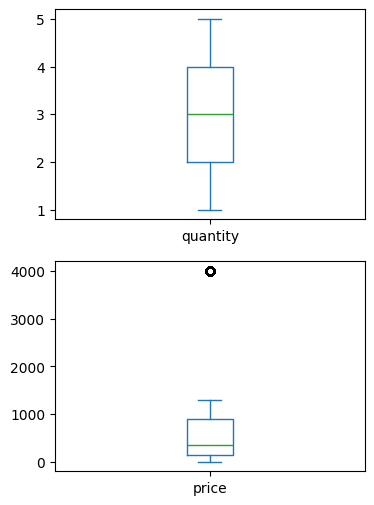

In [34]:
# Check for outliers in the necessary columns and handle them appropriately
features = ['quantity', 'price']
final_df[features].plot(kind='box', subplots=True, layout=(2,1), sharex=False, figsize=(4,6))

In [35]:
# Handle outliers in price column using IQR method

def remove_outliers(data, column):
    """
    Remove outliers from a DataFrame column using the IQR method.
    
    Parameters:
        data (DataFrame): The DataFrame containing the data.
        column (str): The name of the column containing the data to be cleaned.
    
    Returns:
        DataFrame: The DataFrame with outliers removed.
    """
    # Calculate quartiles
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    
    # Calculate IQR
    IQR = Q3 - Q1
    
    # Define outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    
    # Remove outliers from the dataset
    cleaned_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    
    return cleaned_data

In [36]:
# call the function above on the price column to handle the outliers in our dataset
clean_data = remove_outliers(final_df, 'price')

In [37]:
# print out the data without outliers
clean_data

,event_id,customer_id,event_timestamp,event_type,device_id,location,currency,order_id,status,checked_out_at,line_item_id,item_id,quantity,name,price
0,14786,e049bab94504,2024-03-26 22:05:58.863661,visit,b988ba17b245,Saint Helena,NGN,493c1a497d49,success,2024-03-30 04:19:10.406794,3201,4,2,Microsoft Xbox Series X,499.99
1,14786,e049bab94504,2024-03-26 22:05:58.863661,visit,b988ba17b245,Saint Helena,NGN,493c1a497d49,success,2024-03-30 04:19:10.406794,3202,5,4,Nike Air Max 270,129.99
2,14786,e049bab94504,2024-03-26 22:05:58.863661,visit,b988ba17b245,Saint Helena,NGN,493c1a497d49,success,2024-03-30 04:19:10.406794,3203,9,5,Nintendo Switch,299.99
3,14786,e049bab94504,2024-03-26 22:05:58.863661,visit,b988ba17b245,Saint Helena,NGN,493c1a497d49,success,2024-03-30 04:19:10.406794,3204,12,1,Coca-Cola 12-Pack,5.99
4,14786,e049bab94504,2024-03-26 22:05:58.863661,visit,b988ba17b245,Saint Helena,NGN,493c1a497d49,success,2024-03-30 04:19:10.406794,3205,6,2,Adidas Ultraboost,180.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578315,161958,3dbf43c85a9d,2024-03-30 04:03:18.224196,add_to_cart,ee544191fa1e,Christmas Island,USD,ff017ac859d5,failed,2024-03-30 04:14:18.224200,34941,1,3,iPhone 13,1099.99
578316,161959,3dbf43c85a9d,2024-03-30 04:03:18.224198,remove_from_cart,ee544191fa1e,Christmas Island,USD,ff017ac859d5,failed,2024-03-30 04:14:18.224200,34940,4,3,Microsoft Xbox Series X,499.99
578317,161959,3dbf43c85a9d,2024-03-30 04:03:18.224198,remove_from_cart,ee544191fa1e,Christmas Island,USD,ff017ac859d5,failed,2024-03-30 04:14:18.224200,34941,1,3,iPhone 13,1099.99
578318,161960,3dbf43c85a9d,2024-03-30 04:14:18.224200,checkout,ee544191fa1e,Christmas Island,USD,ff017ac859d5,failed,2024-03-30 04:14:18.224200,34940,4,3,Microsoft Xbox Series X,499.99


In [38]:
# function for creating new features in our dataset: day, month, year, and am_pm

def extract_date_features(date):
    """
    Extract name of day, name of month, year, and AM/PM from a datetime column.
    
    Parameters:
        date (Series): The datetime column to extract features from.
    
    Returns:
        DataFrame: A DataFrame containing the extracted features.
    """
    # Ensure the input is in datetime format
    date_column = pd.to_datetime(date, format='%Y-%m-%d %H:%M:%S.%f')

    # Extracting day name, month name, year, and AM/PM
    day_name = date_column.dt.strftime('%A')  # Full name of the day
    month_name = date_column.dt.strftime('%B')  # Full name of the month
    year = date_column.dt.year
    am_pm = date_column.dt.strftime('%p')

    # Extracting full date
    full_date = date_column.dt.strftime('%Y-%m-%d')

    # Create a DataFrame to store the features
    features_df = pd.DataFrame({'Day': day_name, 'Month': month_name, 'Year': year, 'AM/PM': am_pm, 'Date': full_date})

    return features_df

In [39]:
# Extract the datetime features
date_time_features = extract_date_features(clean_data['event_timestamp'])

In [40]:
# Print first 5 rows of our datetime features
date_time_features.head()

,Day,Month,Year,AM/PM,Date
0,Tuesday,March,2024,PM,2024-03-26
1,Tuesday,March,2024,PM,2024-03-26
2,Tuesday,March,2024,PM,2024-03-26
3,Tuesday,March,2024,PM,2024-03-26
4,Tuesday,March,2024,PM,2024-03-26


In [41]:
# Merge the clean_data dataframe with the new features using their indexes
clean_data2 = clean_data.merge(date_time_features, left_index=True, right_index=True, how='inner')

In [42]:
# print the first 5 rows to see the result of the merge operation above
clean_data2.head()

,event_id,customer_id,event_timestamp,event_type,device_id,location,currency,order_id,status,checked_out_at,line_item_id,item_id,quantity,name,price,Day,Month,Year,AM/PM,Date
0,14786,e049bab94504,2024-03-26 22:05:58.863661,visit,b988ba17b245,Saint Helena,NGN,493c1a497d49,success,2024-03-30 04:19:10.406794,3201,4,2,Microsoft Xbox Series X,499.99,Tuesday,March,2024,PM,2024-03-26
1,14786,e049bab94504,2024-03-26 22:05:58.863661,visit,b988ba17b245,Saint Helena,NGN,493c1a497d49,success,2024-03-30 04:19:10.406794,3202,5,4,Nike Air Max 270,129.99,Tuesday,March,2024,PM,2024-03-26
2,14786,e049bab94504,2024-03-26 22:05:58.863661,visit,b988ba17b245,Saint Helena,NGN,493c1a497d49,success,2024-03-30 04:19:10.406794,3203,9,5,Nintendo Switch,299.99,Tuesday,March,2024,PM,2024-03-26
3,14786,e049bab94504,2024-03-26 22:05:58.863661,visit,b988ba17b245,Saint Helena,NGN,493c1a497d49,success,2024-03-30 04:19:10.406794,3204,12,1,Coca-Cola 12-Pack,5.99,Tuesday,March,2024,PM,2024-03-26
4,14786,e049bab94504,2024-03-26 22:05:58.863661,visit,b988ba17b245,Saint Helena,NGN,493c1a497d49,success,2024-03-30 04:19:10.406794,3205,6,2,Adidas Ultraboost,180.00,Tuesday,March,2024,PM,2024-03-26


In [43]:
# Get the number of days it took for each customer to check out their carts using the event_timestamp and checked_out_at features

# Convert the datetime columns to pandas datetime objects
clean_data2['checked_out_at'] = pd.to_datetime(clean_data2['checked_out_at'])
clean_data2['event_timestamp'] = pd.to_datetime(clean_data2['event_timestamp'])

# Calculate the duration between column_in and column_out in days
clean_data2['check_out_duration(days)'] = (clean_data2['checked_out_at'] - clean_data2['event_timestamp']).dt.days

In [44]:
# print the first 5 rows to confirm the column for checkout duration
clean_data2.head()

,event_id,customer_id,event_timestamp,event_type,device_id,location,currency,order_id,status,checked_out_at,...,item_id,quantity,name,price,Day,Month,Year,AM/PM,Date,check_out_duration(days)
0,14786,e049bab94504,2024-03-26 22:05:58.863661,visit,b988ba17b245,Saint Helena,NGN,493c1a497d49,success,2024-03-30 04:19:10.406794,...,4,2,Microsoft Xbox Series X,499.99,Tuesday,March,2024,PM,2024-03-26,3
1,14786,e049bab94504,2024-03-26 22:05:58.863661,visit,b988ba17b245,Saint Helena,NGN,493c1a497d49,success,2024-03-30 04:19:10.406794,...,5,4,Nike Air Max 270,129.99,Tuesday,March,2024,PM,2024-03-26,3
2,14786,e049bab94504,2024-03-26 22:05:58.863661,visit,b988ba17b245,Saint Helena,NGN,493c1a497d49,success,2024-03-30 04:19:10.406794,...,9,5,Nintendo Switch,299.99,Tuesday,March,2024,PM,2024-03-26,3
3,14786,e049bab94504,2024-03-26 22:05:58.863661,visit,b988ba17b245,Saint Helena,NGN,493c1a497d49,success,2024-03-30 04:19:10.406794,...,12,1,Coca-Cola 12-Pack,5.99,Tuesday,March,2024,PM,2024-03-26,3
4,14786,e049bab94504,2024-03-26 22:05:58.863661,visit,b988ba17b245,Saint Helena,NGN,493c1a497d49,success,2024-03-30 04:19:10.406794,...,6,2,Adidas Ultraboost,180.00,Tuesday,March,2024,PM,2024-03-26,3


In [45]:
# Make a duplicate of the dataframe so we can have an original copy after dropping 'event_timestamp' and 'checked_out_at'
clean_data3 = clean_data2.copy()

In [46]:
# print the head
clean_data3.head()

,event_id,customer_id,event_timestamp,event_type,device_id,location,currency,order_id,status,checked_out_at,...,item_id,quantity,name,price,Day,Month,Year,AM/PM,Date,check_out_duration(days)
0,14786,e049bab94504,2024-03-26 22:05:58.863661,visit,b988ba17b245,Saint Helena,NGN,493c1a497d49,success,2024-03-30 04:19:10.406794,...,4,2,Microsoft Xbox Series X,499.99,Tuesday,March,2024,PM,2024-03-26,3
1,14786,e049bab94504,2024-03-26 22:05:58.863661,visit,b988ba17b245,Saint Helena,NGN,493c1a497d49,success,2024-03-30 04:19:10.406794,...,5,4,Nike Air Max 270,129.99,Tuesday,March,2024,PM,2024-03-26,3
2,14786,e049bab94504,2024-03-26 22:05:58.863661,visit,b988ba17b245,Saint Helena,NGN,493c1a497d49,success,2024-03-30 04:19:10.406794,...,9,5,Nintendo Switch,299.99,Tuesday,March,2024,PM,2024-03-26,3
3,14786,e049bab94504,2024-03-26 22:05:58.863661,visit,b988ba17b245,Saint Helena,NGN,493c1a497d49,success,2024-03-30 04:19:10.406794,...,12,1,Coca-Cola 12-Pack,5.99,Tuesday,March,2024,PM,2024-03-26,3
4,14786,e049bab94504,2024-03-26 22:05:58.863661,visit,b988ba17b245,Saint Helena,NGN,493c1a497d49,success,2024-03-30 04:19:10.406794,...,6,2,Adidas Ultraboost,180.00,Tuesday,March,2024,PM,2024-03-26,3


In [47]:
# Drop 'event_timestamp' and 'checked_out_at'
clean_data3.drop(['event_timestamp','checked_out_at'], axis=1, inplace=True)

Lastly, I would love to take a very good look at the different features in the dataset above before proceeding to carry out exploratory data analysis to uncover patterns and insights in the data, drop some columns that are not needed, especially the 'IDs'. There is a lot of them and there is a possibility of not needing some of them.

We are not provided with the description for each of the features so its easy to decipher what each of them mean, I tried googling, tried Kaggle but couldn't find them. So, I will have to figure it out as follows:

1. event_id

2. customer_id

3. device_id

4. order_id

5. line_item_id

6. item_id

1. Event_id: Event type and Event Id are closely related. We have unique event types and each of those uniques are coded with IDs set as event_id. It would be wise to drop one of them and retain the other.

The focus of this analysis is solely on understanding the customers better and it would be wise to know what kind of events bring them to the website(event type) but there is really no need encoding the event types in IDs anymore.

I will be dropping the event_id

In [48]:
# Compare event_id to event_type
clean_data3[['event_id', 'event_type']]

,event_id,event_type
0,14786,visit
1,14786,visit
2,14786,visit
3,14786,visit
4,14786,visit
...,...,...
578315,161958,add_to_cart
578316,161959,remove_from_cart
578317,161959,remove_from_cart
578318,161960,checkout


In [49]:
# Drop event_id column
clean_data3.drop('event_id', axis=1, inplace=True)

2. Customer_id: The core of our analysis revolves around the customers and this is the feature that uniquely identifies them. I will be keeping this

In [50]:
clean_data3[['customer_id']].head()

,customer_id
0,e049bab94504
1,e049bab94504
2,e049bab94504
3,e049bab94504
4,e049bab94504


3. device_id: I first suspected that the device id is representing the same thing name is representing but upon taking a look at the data below, I discovered that its a different case entirely. The name is representing the product names each customer bought.

On the other hand though, from the schema provided, each device id is associated with a customer which means we could use device Id to trace a customer id. I will be dropping device Id, the customer id is good enough.

In [51]:
# checking microsoft xbox series x to see if they would all have the same device id
clean_data3[clean_data3['name'] == 'Microsoft Xbox Series X']

,customer_id,event_type,device_id,location,currency,order_id,status,line_item_id,item_id,quantity,name,price,Day,Month,Year,AM/PM,Date,check_out_duration(days)
0,e049bab94504,visit,b988ba17b245,Saint Helena,NGN,493c1a497d49,success,3201,4,2,Microsoft Xbox Series X,499.99,Tuesday,March,2024,PM,2024-03-26,3
6,e049bab94504,visit,b988ba17b245,Saint Helena,NGN,493c1a497d49,success,3201,4,2,Microsoft Xbox Series X,499.99,Wednesday,March,2024,AM,2024-03-27,2
12,e049bab94504,visit,b988ba17b245,Saint Helena,NGN,493c1a497d49,success,3201,4,2,Microsoft Xbox Series X,499.99,Saturday,March,2024,AM,2024-03-30,0
18,e049bab94504,visit,b988ba17b245,Saint Helena,NGN,493c1a497d49,success,3201,4,2,Microsoft Xbox Series X,499.99,Saturday,March,2024,AM,2024-03-30,0
24,e049bab94504,add_to_cart,b988ba17b245,Saint Helena,NGN,493c1a497d49,success,3201,4,2,Microsoft Xbox Series X,499.99,Saturday,March,2024,AM,2024-03-30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578310,3dbf43c85a9d,visit,ee544191fa1e,Christmas Island,USD,ff017ac859d5,failed,34940,4,3,Microsoft Xbox Series X,499.99,Saturday,March,2024,AM,2024-03-30,0
578312,3dbf43c85a9d,add_to_cart,ee544191fa1e,Christmas Island,USD,ff017ac859d5,failed,34940,4,3,Microsoft Xbox Series X,499.99,Saturday,March,2024,AM,2024-03-30,0
578314,3dbf43c85a9d,add_to_cart,ee544191fa1e,Christmas Island,USD,ff017ac859d5,failed,34940,4,3,Microsoft Xbox Series X,499.99,Saturday,March,2024,AM,2024-03-30,0
578316,3dbf43c85a9d,remove_from_cart,ee544191fa1e,Christmas Island,USD,ff017ac859d5,failed,34940,4,3,Microsoft Xbox Series X,499.99,Saturday,March,2024,AM,2024-03-30,0


In [52]:
# dropping device id
clean_data3.drop('device_id', axis=1, inplace=True)

4. order_id: order id is associated with orders, each order is tagged with an id but a closer look at the schema once again, we will discover that orders can be identified using both customer id(Who bought) and order id(What did who buy).

I will be dropping order_id also, I won't be needing it in my analysis.

In [53]:
# dropping  order_id
clean_data3.drop('order_id', axis=1, inplace=True)

5. line_items_id: By definition, Line items belong to an order and contain information about the purchasable added to the cart. They also contain information on the quantity of that purchasable as well as totals, tax, shipping, and promotion information that get used to calculate the line item total.

Line items id is used to identify each line item and I won't be needing it for my analysis upon looking at it side by side with the objectives of my analysis which would centre around visit frequency, location analysis, and overall purchase behaviour of customers.

In [54]:
# dropping line items id
clean_data3.drop('line_item_id', axis=1, inplace=True)

6. item_id: Item id and name (names of the products) are basically the same thing, I will dropping item_id and retain product names

In [55]:
# dropping item_id column
clean_data3.drop('item_id', axis=1, inplace=True)

In [56]:
# Check our dataset
clean_data3.head()

,customer_id,event_type,location,currency,status,quantity,name,price,Day,Month,Year,AM/PM,Date,check_out_duration(days)
0,e049bab94504,visit,Saint Helena,NGN,success,2,Microsoft Xbox Series X,499.99,Tuesday,March,2024,PM,2024-03-26,3
1,e049bab94504,visit,Saint Helena,NGN,success,4,Nike Air Max 270,129.99,Tuesday,March,2024,PM,2024-03-26,3
2,e049bab94504,visit,Saint Helena,NGN,success,5,Nintendo Switch,299.99,Tuesday,March,2024,PM,2024-03-26,3
3,e049bab94504,visit,Saint Helena,NGN,success,1,Coca-Cola 12-Pack,5.99,Tuesday,March,2024,PM,2024-03-26,3
4,e049bab94504,visit,Saint Helena,NGN,success,2,Adidas Ultraboost,180.00,Tuesday,March,2024,PM,2024-03-26,3


    DATA FORMATTING: Standardize datatypes | Rename features if need be

In [57]:
# rename the name column to product
clean_data3.rename(columns={'name':'product'}, inplace=True)

In [58]:
# Confirm the change made by printing the head of our dataframe
clean_data3.head()

,customer_id,event_type,location,currency,status,quantity,product,price,Day,Month,Year,AM/PM,Date,check_out_duration(days)
0,e049bab94504,visit,Saint Helena,NGN,success,2,Microsoft Xbox Series X,499.99,Tuesday,March,2024,PM,2024-03-26,3
1,e049bab94504,visit,Saint Helena,NGN,success,4,Nike Air Max 270,129.99,Tuesday,March,2024,PM,2024-03-26,3
2,e049bab94504,visit,Saint Helena,NGN,success,5,Nintendo Switch,299.99,Tuesday,March,2024,PM,2024-03-26,3
3,e049bab94504,visit,Saint Helena,NGN,success,1,Coca-Cola 12-Pack,5.99,Tuesday,March,2024,PM,2024-03-26,3
4,e049bab94504,visit,Saint Helena,NGN,success,2,Adidas Ultraboost,180.00,Tuesday,March,2024,PM,2024-03-26,3


In [59]:
# Check the datatypes of the different features in our dataset
clean_data3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 538605 entries, 0 to 578319
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   customer_id               538605 non-null  object 
 1   event_type                538605 non-null  object 
 2   location                  538605 non-null  object 
 3   currency                  538605 non-null  object 
 4   status                    538605 non-null  object 
 5   quantity                  538605 non-null  int64  
 6   product                   538605 non-null  object 
 7   price                     538605 non-null  float64
 8   Day                       538605 non-null  object 
 9   Month                     538605 non-null  object 
 10  Year                      538605 non-null  int32  
 11  AM/PM                     538605 non-null  object 
 12  Date                      538605 non-null  object 
 13  check_out_duration(days)  538605 non-null  int64 

In [60]:
# Convert the year feature to a string object
clean_data3['Year'] = clean_data3['Year'].astype(str)

A very good look at the formats of the various features in our data above shows that they are well formatted and our data has been cleaned successfully too.

# EXPLORATORY DATA ANALYSIS

Exploratory Data Analysis is a data analytics process used to understand the data in depth and learn the different data characteristics, often with visual means. This allows us to get a better feel of the data and find useful patterns in it, Simplilearn, 2024.

It is crucial to understand the data in depth before performing data analysis or building a model. Its important to know the patterns in our data and determine which variables are important and which do not play a significant role in the output. Further, some variables may have correlations with other variables.

This will be carried out as follows:

1. Non-Graphical Univariate Analysis

2. Graphical Univariate Analysis

3. Non-Graphical Multivariate Analysis

4. Graphical Multivariate analysis

    NON-GRAPHICAL UNIVARIATE ANALYSIS

To carry out non-graphical univariate exploratory data analysis, it is important to get a brief overview of our dataset. I will be running the 4 basic commands needed to do this:

1. Check the head

2. Check the shape

3. Check the descriptive statistics

4. Check the info  

In [61]:
# Check the head of our dataset
clean_data3.head()

,customer_id,event_type,location,currency,status,quantity,product,price,Day,Month,Year,AM/PM,Date,check_out_duration(days)
0,e049bab94504,visit,Saint Helena,NGN,success,2,Microsoft Xbox Series X,499.99,Tuesday,March,2024,PM,2024-03-26,3
1,e049bab94504,visit,Saint Helena,NGN,success,4,Nike Air Max 270,129.99,Tuesday,March,2024,PM,2024-03-26,3
2,e049bab94504,visit,Saint Helena,NGN,success,5,Nintendo Switch,299.99,Tuesday,March,2024,PM,2024-03-26,3
3,e049bab94504,visit,Saint Helena,NGN,success,1,Coca-Cola 12-Pack,5.99,Tuesday,March,2024,PM,2024-03-26,3
4,e049bab94504,visit,Saint Helena,NGN,success,2,Adidas Ultraboost,180.00,Tuesday,March,2024,PM,2024-03-26,3


A look at the top 5 rows in our dataset shows that we have the following features in our dataset:

1. customer_id: The unique identifier for each customer that visits the website

2. event_type: The nature of the activity of the customer on the website

3. location: The location of the customer

4. currency: The type of currency used for the transaction

5. status: The status of the purchase- successful or failed

6. quantity: The quantity of the purchase in numbers

7. price: The total price of the purchase/transaction made

8. Day: The day of the week the transaction took place

9. Month: The month the transaction took place

10. Year: The year the transaction took place

11. AM/PM: The time of day the transaction took place- morning or evening

12. Date: The full date of the transaction

13. check_out_duration(days): How long it took the customer to check out

14. product: The name of the items the customer bought

In [62]:
# Check the shape of the dataset
clean_data3.shape

(538605, 14)

The shape above shows that our dataset has 538605 observations and 14 features

In [63]:
# Check the descriptive statistics of the dataset
clean_data3.describe()

,quantity,price,check_out_duration(days)
count,538605.000000,538605.000000,538605.000000
mean,3.009142,464.667199,0.452445
std,1.405937,397.553399,1.714673
min,1.000000,5.990000,0.000000
25%,2.000000,149.950000,0.000000
50%,3.000000,349.990000,0.000000
75%,4.000000,799.990000,0.000000
max,5.000000,1299.990000,11.000000


The descriptive statistics generated by the describe function shows us non-graphical analysis for numerical features in our dataset

Individual statistical measures generated can also be calculated by using the following commands:

- df.count()
- df.mean()
- df.std()
- df.min()
- df.quantile([0.25, 0.5, 0.75], axis = 0)
- df.median()
- df.max()

The three measures for central tendency are the mode, mean and median. The commands to determine them are:

- df.mode()
- df.mean()
- df.median()

In [64]:
# Check the info of the dataset
clean_data3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 538605 entries, 0 to 578319
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   customer_id               538605 non-null  object 
 1   event_type                538605 non-null  object 
 2   location                  538605 non-null  object 
 3   currency                  538605 non-null  object 
 4   status                    538605 non-null  object 
 5   quantity                  538605 non-null  int64  
 6   product                   538605 non-null  object 
 7   price                     538605 non-null  float64
 8   Day                       538605 non-null  object 
 9   Month                     538605 non-null  object 
 10  Year                      538605 non-null  object 
 11  AM/PM                     538605 non-null  object 
 12  Date                      538605 non-null  object 
 13  check_out_duration(days)  538605 non-null  int64 

The info command above shows the categorical and numerical features in our dataset. All of our features are object dtypes except for quantity, price, and check_out_duration(days).

We can also confirm that there are no missing values as well, we can confirm this by calling isnull below:

In [65]:
# Check null values
clean_data3.isnull().sum()

customer_id                 0
event_type                  0
location                    0
currency                    0
status                      0
quantity                    0
product                     0
price                       0
Day                         0
Month                       0
Year                        0
AM/PM                       0
Date                        0
check_out_duration(days)    0
dtype: int64

    GRAPHICAL UNIVARIATE ANALYSIS

The graphical univariate analysis is usually useful for plotting the distributions of the various features in our data to see concepts like measures of central tendency, distribution, skew, outliers etc.

I will be:

1. Using histograms, box plots, and density plots to understand the distribution of numerical variables.

2. Create bar charts and pie charts to visualize categorical variables.

Using histograms, box plots, and density plots to understand the distribution of numerical variables.

The numerical variables are: quantity, price

array([[<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>]],
      dtype=object)

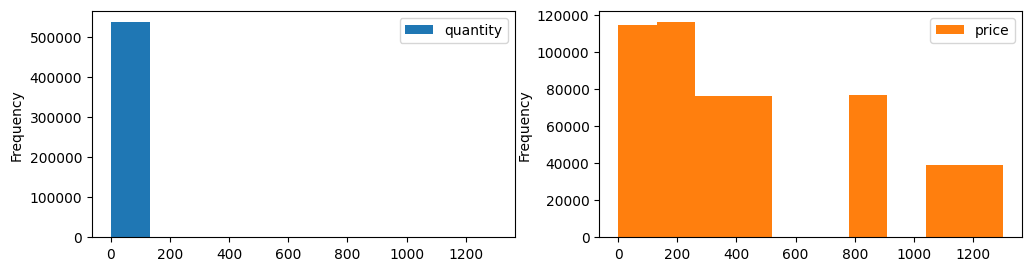

In [66]:
# Check the distribution of quantity and price using histograms
features = ['quantity', 'price']
clean_data3[features].plot(kind='hist', subplots=True, layout=(3, 2), sharex=False, figsize=(12, 10))

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

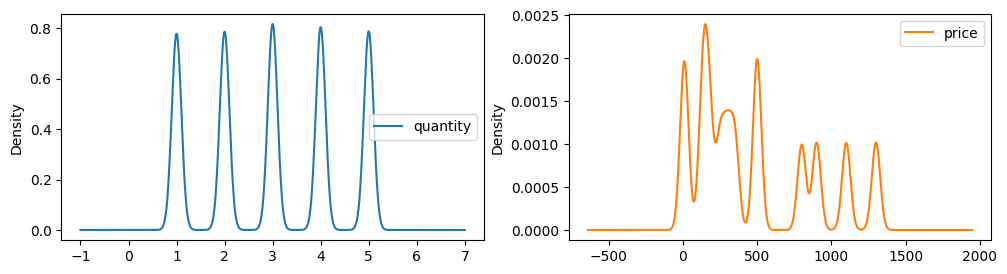

In [67]:
# Check the distribution of quantity and price using density plot
features = ['quantity', 'price']
clean_data3[features].plot(kind='density', subplots=True, layout=(3, 2), sharex=False, figsize=(12, 10))

quantity       Axes(0.125,0.653529;0.352273x0.226471)
price       Axes(0.547727,0.653529;0.352273x0.226471)
dtype: object

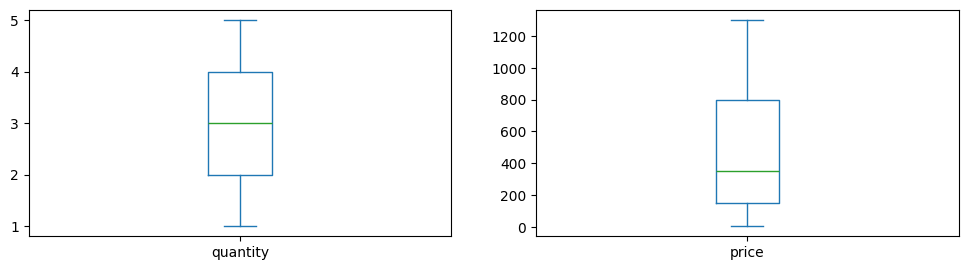

In [68]:
# Check for outliers in quantity and price using density plot
features = ['quantity', 'price']
clean_data3[features].plot(kind='box', subplots=True, layout=(3, 2), sharex=False, figsize=(12, 10))

Create bar charts to visualize categorical variables.

The categorical variables are: 'event_type', 'location', 'currency', 'status', 'Day', 'Month', 'Year', 'AM/PM', 'Date','check_out_duration(days)', 'product'

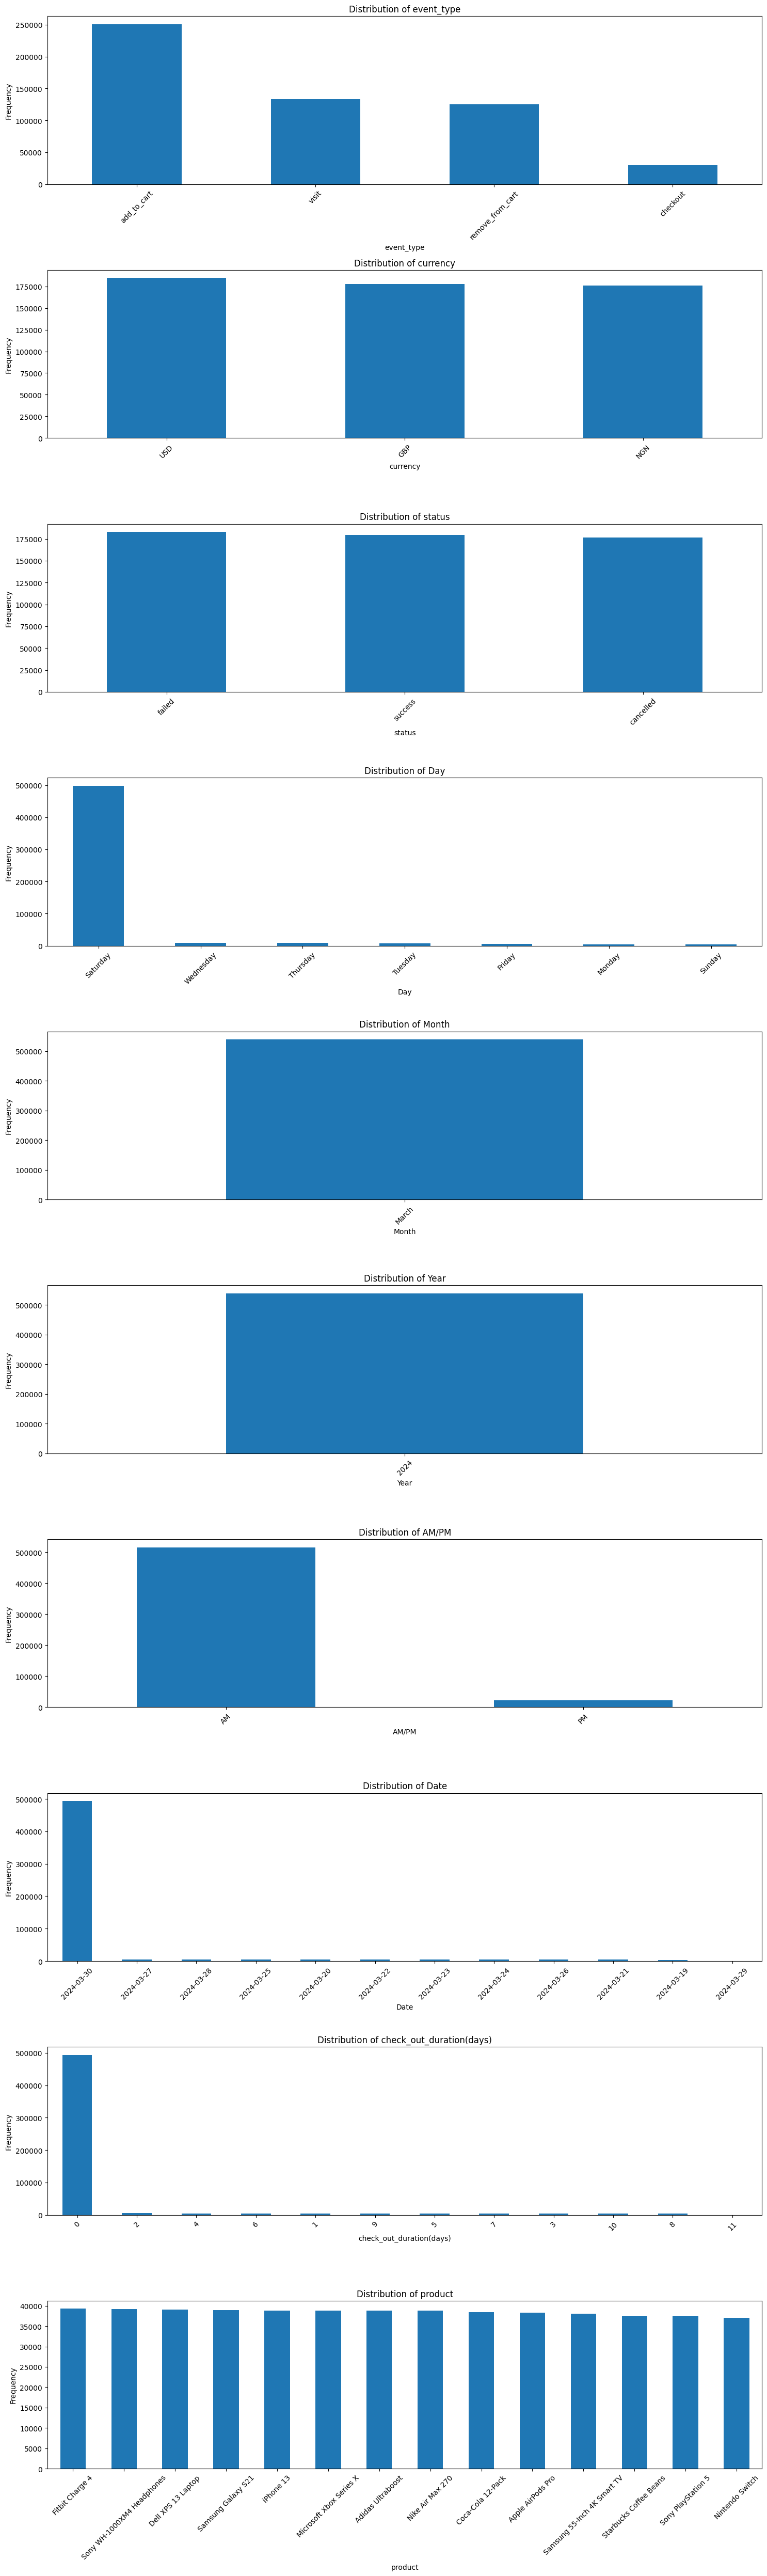

In [69]:
# Plot the categorical variables using bar charts
features_categorical = ['event_type', 'currency', 'status', 'Day', 'Month', 'Year', 'AM/PM', 'Date','check_out_duration(days)', 'product']

# Calculate the number of rows and columns for subplots
num_plots = len(features_categorical)
num_rows = num_plots
num_cols = 1

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Plot each categorical variable
for i, feature in enumerate(features_categorical):
    clean_data3[feature].value_counts().plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
    axes[i].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

In [70]:
# Get the unique locations
len(clean_data3['location'].unique())

243

We have 243 entries for the location where people visit the website from, it would be difficult to represent that on a plot.
I will be plotting the top 20 on a bar chart.

<Axes: xlabel='location'>

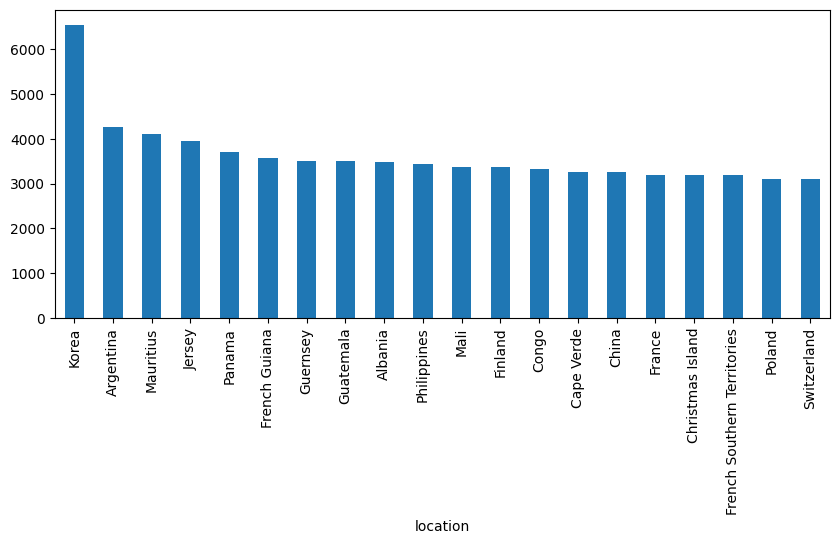

In [71]:
# Get the counts of each unique location
location_counts = clean_data3['location'].value_counts().sort_values(ascending=False)
location_counts.head(20).plot(kind='bar', figsize=(10,4))

NOTE

From the graphical univariate analysis carried out above, we can already begin to see certain patterns that really stand out. Some of them are:

1. About 15,000 occassions of customers adding items to cart and less than 3,000 actually check out. This is not a good ratio

2. The dataset is for the month of March and year 2024. Successful orders only occurred on Saturday 30th in the morning.

3. Successful, failed, and cancelled orders are all almost at the same rate.

4. Majority of the customers are from Korea

5. Checkout rate for successful orders take less than a day, the customers that actually checkout are very decisive.

    NON-GRAPHICAL MULTIVARIATE ANALYSIS

The non-graphical multivariate analysis involves finding relationships between two of more features in our dataset. To achieve this, I will be getting correlation co-efficients.

In [72]:
# Correlation matrix for numeric features

# Excluding non-numeric columns
numeric_data = clean_data3.select_dtypes(include=['number'])

# Calculating correlation matrix
correlation_matrix = numeric_data.corr()

# Print correlation matrix
print(correlation_matrix)

                          quantity     price  check_out_duration(days)
quantity                  1.000000  0.004644                 -0.000371
price                     0.004644  1.000000                  0.002234
check_out_duration(days) -0.000371  0.002234                  1.000000


Explaining the correlation matrix generated above:

1. Quantity vs. Quantity:
   - The correlation of a variable with itself is always 1. So, the correlation of quantity with itself is 1. This is expected and indicates a perfect positive correlation.

2. Price vs. Price:
   - Similarly, the correlation of price with itself is 1. This also indicates a perfect positive correlation.

3. Check-out Duration vs. Check-out Duration:
   - The correlation of check_out_duration(days) with itself is 1, which again indicates a perfect positive correlation.

4. Quantity vs. Price:
   - The correlation between quantity and price is very close to zero (0.004644). This suggests a very weak positive correlation or almost no correlation at all between the quantity of items purchased and their price.

5. Quantity vs. Check-out Duration:
   - The correlation between quantity and check_out_duration(days) is very close to zero (-0.000371). This indicates a very weak negative correlation or almost no correlation.

6. Price vs. Check-out Duration:
   - The correlation between price and check_out_duration(days) is very close to zero (0.002234). This suggests a very weak positive correlation or almost no correlation between the price of items and the check-out duration in days.

    GRAPHICAL MULTIVARIATE ANALYSIS

I will be utilising heatmaps, scatter plots, and jointplots to show relationships here

Text(0.5, 1.0, 'Correlation Heatmap')

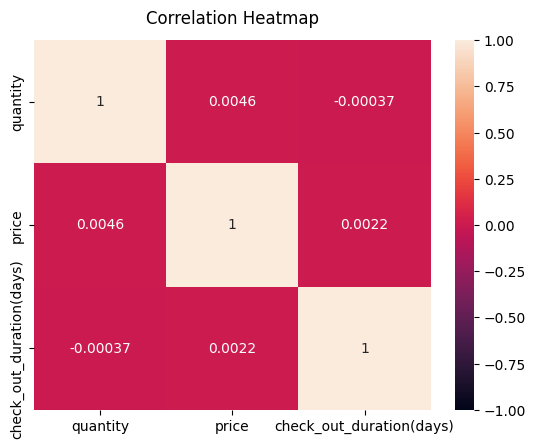

In [73]:
# Heatmap for the correlation between the numerical variables
heatmap = sns.heatmap(numeric_data.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

<Axes: xlabel='quantity', ylabel='price'>

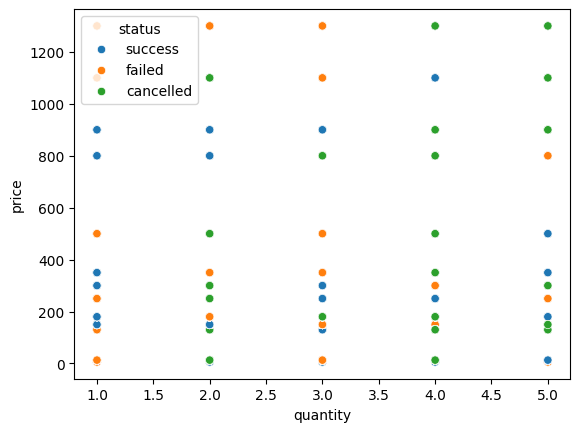

In [74]:
# Relationship between the quantity and price and the status of the event
sns.scatterplot(x='quantity',y='price',hue='status', data=clean_data3)

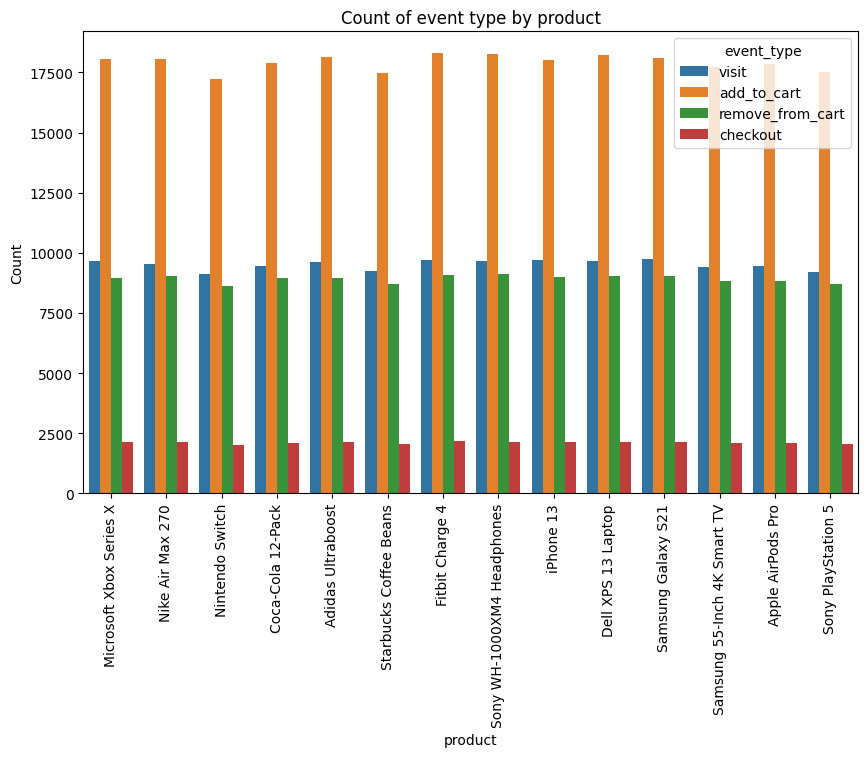

In [75]:
# Count of event type by product
plt.figure(figsize=(10, 6))
sns.countplot(data=clean_data3, x='product', hue='event_type')
plt.title('Count of event type by product')
plt.xlabel('product')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.show()

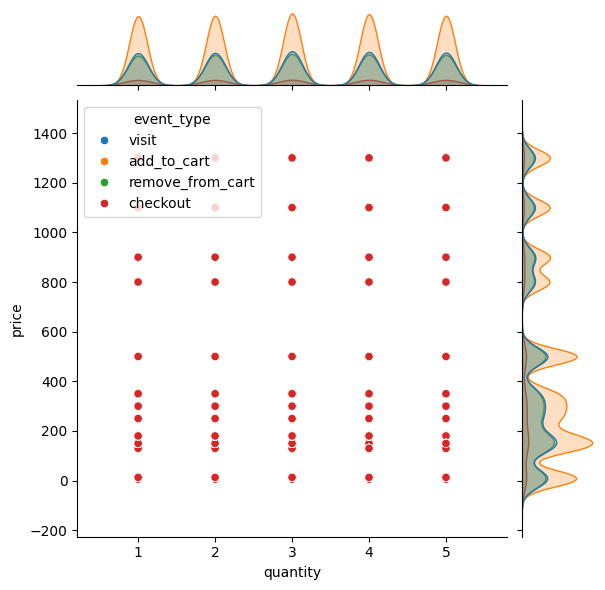

In [76]:
# plot of quantity vs price relationship using event_type
sns.jointplot(x = 'quantity', y = 'price', data = clean_data3, hue='event_type')

# ADDRESSING THE TASK GIVEN

    VISIT FREQUENCY

Visit frquency revolves around traffic to the website, time customers visit the most and when visits peak or drop, locations from which custmers visit. 

To determine how often the customers visit the website, the following questions would be answered:

1. Identify the number of times each unique customer visits the website

2. Identify the time of the day they visit the most- morning or afternoon/evening

3. Identify the peak visit periods- monthly and weekly

4. Which location do customers visit from the most

In [77]:
# Frequency of visitation by day
clean_data3['Day'].value_counts()

Day
Saturday     498158
Wednesday      9369
Thursday       8907
Tuesday        7814
Friday         5285
Monday         4642
Sunday         4430
Name: count, dtype: int64

<Axes: xlabel='Day'>

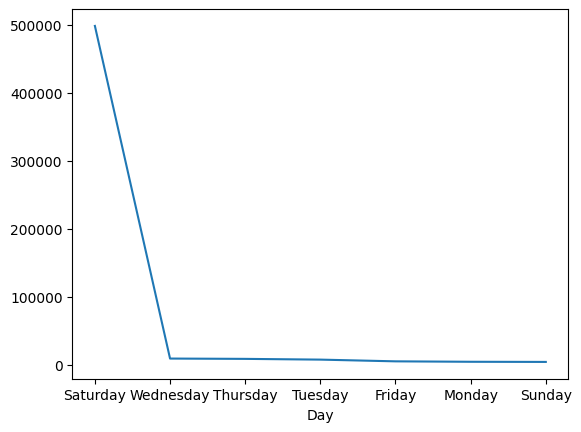

In [78]:
# Plot of frequency of visitation by day
clean_data3['Day'].value_counts().plot(kind='line')

In [79]:
# Number of times each unique customer visits the website
customer_visits = clean_data3.groupby('customer_id')['location'].value_counts().sort_values(ascending=False)
customer_visits

customer_id   location                        
1f57130130cb  Nauru                               360
d12e3eaca47d  Bolivia                             360
cc1402500ac7  Turkey                              348
5e5dc4f32b9c  French Southern Territories         348
1e5725fe2338  Saint Helena                        341
                                                 ... 
ae9ccd7709ee  Lao People's Democratic Republic      3
d36ee291c7cf  American Samoa                        3
bbbb6139ef58  Kuwait                                3
723d1881ab1f  Sri Lanka                             3
2a295782dbbb  Martinique                            3
Name: count, Length: 4574, dtype: int64

<Axes: xlabel='customer_id,location'>

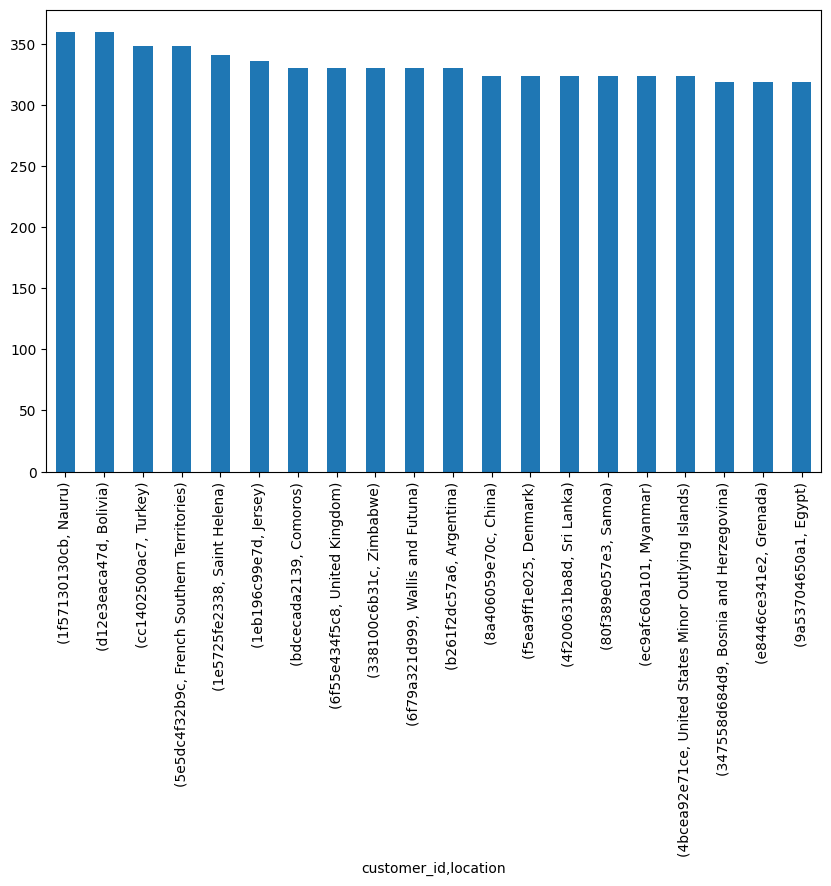

In [80]:
# Plot the top 20 customer visits
customer_visits.head(20).plot(kind='bar', figsize=(10,6))

<Axes: xlabel='customer_id,location'>

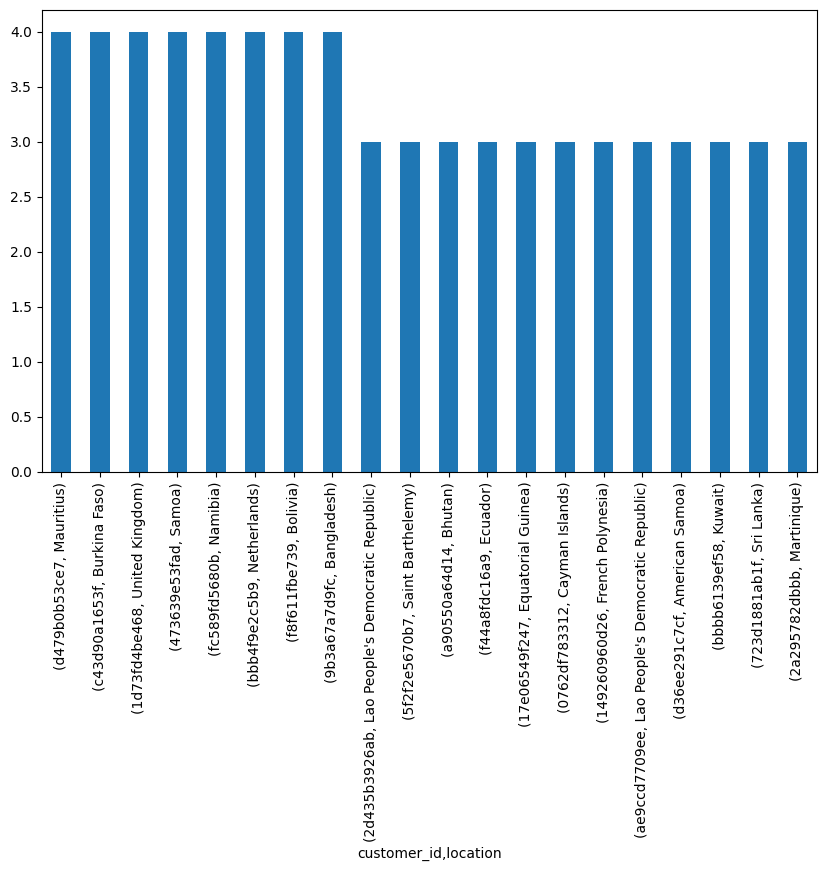

In [81]:
# Plot the bottom 20 customer visits
customer_visits.tail(20).plot(kind='bar', figsize=(10,6))

In [82]:
# What time of the day do they visit the most
time_of_day_visits = clean_data3['AM/PM'].value_counts().sort_values(ascending=False)
time_of_day_visits

AM/PM
AM    516062
PM     22543
Name: count, dtype: int64

<Axes: xlabel='AM/PM'>

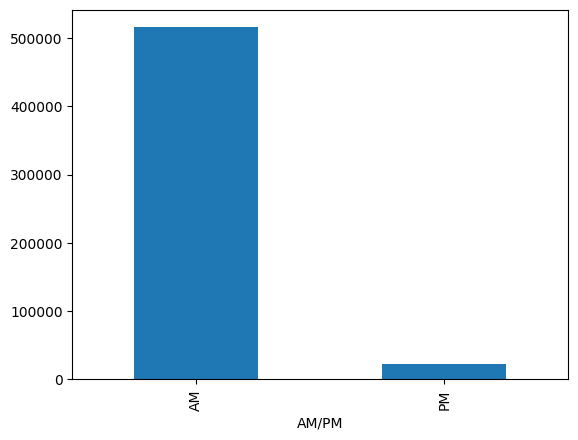

In [83]:
# Plot of visitation by time of the day
time_of_day_visits.plot(kind='bar')

<Axes: xlabel='Month'>

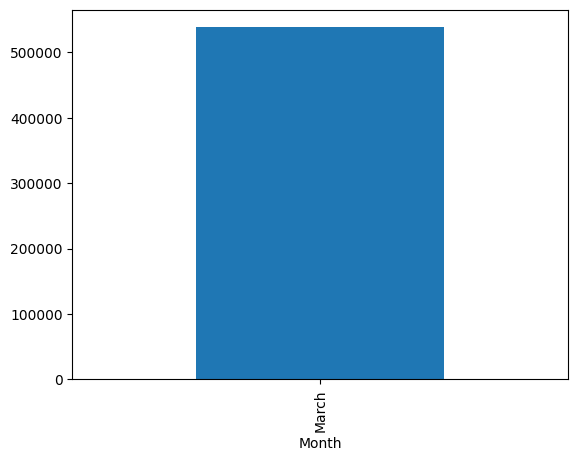

In [84]:
# Monthly peak visitation periods
monthly_freq = clean_data3['Month'].value_counts().sort_values(ascending=False)
monthly_freq.plot(kind='bar')

<Axes: xlabel='Year'>

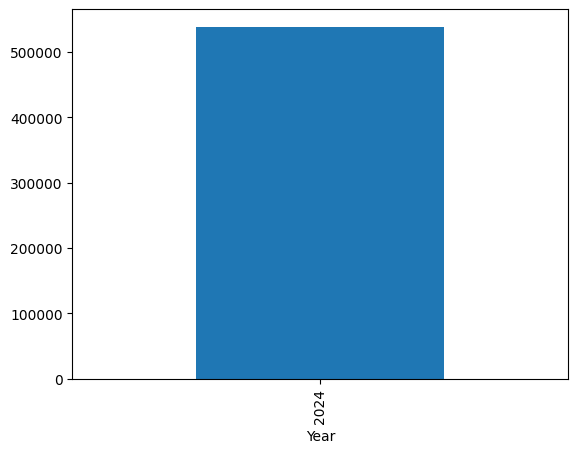

In [85]:
# Yearly peak visitation periods
yearly_freq = clean_data3['Year'].value_counts().sort_values(ascending=False)
yearly_freq.plot(kind='bar')

<Axes: xlabel='location'>

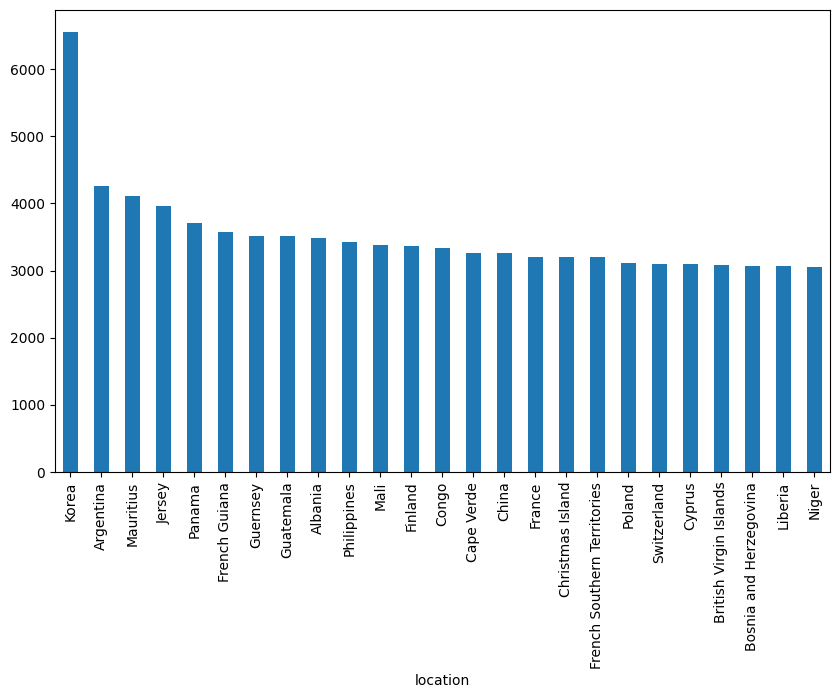

In [86]:
# What location do customers visit from the most?
location_freq = clean_data3['location'].value_counts().sort_values(ascending=False)

# Plot top 25
location_freq.head(25).plot(kind='bar', figsize=(10,6))

<Axes: xlabel='location'>

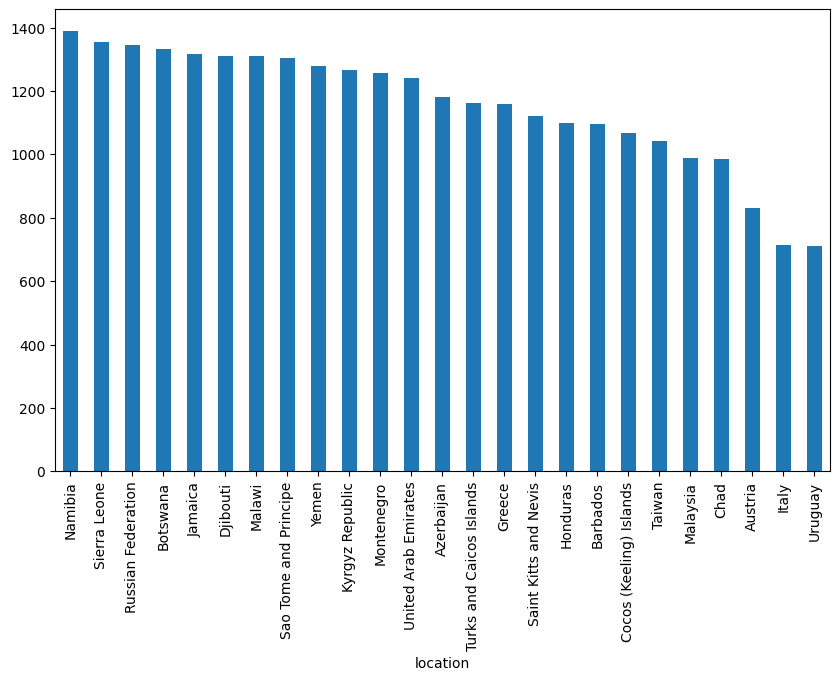

In [87]:
# Plot bottom 25 locations customers visit from
location_freq.tail(25).plot(kind='bar', figsize=(10,6))

    LOCATION ANALYSIS

To determine the customers' locations and how that influences purchasing power, I will be answering the following questions:

1. Identify the unique locations

2. Identify different locations from which customers visit the most

3. Check for relationship between customer location and check out duration, status, event_type, quantity, and time they visit the most

4. Identify if some products are more popular in certain locations

In [88]:
# Unique locations
unique_locations = clean_data3.location.unique()
unique_locations

array(['Saint Helena', 'Djibouti', 'Ecuador', 'Mali', 'Grenada',
       'United States Minor Outlying Islands', 'Aruba', 'North Macedonia',
       'Germany', 'Saint Pierre and Miquelon', 'Sudan',
       'Christmas Island', 'Palestinian Territory', 'Qatar', 'Israel',
       'Netherlands Antilles', 'French Guiana', 'India', 'Switzerland',
       'Canada', 'Philippines', 'Micronesia', 'British Virgin Islands',
       'Barbados', 'Guadeloupe', 'Chad', 'Bouvet Island (Bouvetoya)',
       'Mauritania', 'Thailand', 'Tuvalu', 'Poland', 'Greenland',
       'Saint Martin', 'Guatemala', 'Bermuda', 'Australia', 'Malawi',
       'Mozambique', 'Costa Rica', 'Oman', 'Armenia', 'Tokelau',
       'Myanmar', 'Angola', 'Sierra Leone', 'Denmark',
       'Falkland Islands (Malvinas)', 'Taiwan', 'Norfolk Island', 'Egypt',
       'Yemen', 'Cocos (Keeling) Islands', 'Northern Mariana Islands',
       'Chile', 'Iraq', 'Antigua and Barbuda', 'Guam', 'Bahrain',
       'Singapore', 'Jordan', 'Serbia', 'Kazakhstan

In [89]:
# Number of unique locations
len(unique_locations)

243

In [90]:
# Event type analysis by location
location_event_type = clean_data3.groupby('location')[['event_type']].value_counts()
location_event_type

location     event_type      
Afghanistan  add_to_cart          860
             visit                460
             remove_from_cart     380
             checkout             110
Albania      add_to_cart         1801
                                 ... 
Zambia       checkout              88
Zimbabwe     add_to_cart          781
             visit                473
             remove_from_cart     429
             checkout              93
Name: count, Length: 972, dtype: int64

In [91]:
# product order success analysis by location
product_success_failure_rate = clean_data3.groupby(['location','status'])['product'].value_counts().reset_index()
product_success_rate = product_success_failure_rate[product_success_failure_rate['status'] == 'success'].sort_values(by='count', ascending=False)
product_success_rate

,location,status,product,count
5416,Mauritius,success,Dell XPS 13 Laptop,262
5417,Mauritius,success,Nike Air Max 270,216
5418,Mauritius,success,Fitbit Charge 4,209
4566,Korea,success,Samsung 55-Inch 4K Smart TV,207
5419,Mauritius,success,iPhone 13,207
...,...,...,...,...
3182,Germany,success,Apple AirPods Pro,5
2653,Estonia,success,Adidas Ultraboost,5
2570,Equatorial Guinea,success,Microsoft Xbox Series X,4
2571,Equatorial Guinea,success,Sony PlayStation 5,4


In [92]:
# Location with highest successful orders
product_success_rate.groupby('location')['count'].sum().sort_values(ascending=False)

location
Korea                        2322
Mauritius                    2258
Albania                      1678
Panama                       1621
Bosnia and Herzegovina       1595
                             ... 
Kyrgyz Republic                80
Comoros                        75
Bouvet Island (Bouvetoya)      24
Malaysia                       24
Slovenia                        9
Name: count, Length: 243, dtype: int64

In [93]:
# product order failure analysis by location
product_failure_rate = product_success_failure_rate[product_success_failure_rate['status'] == 'failed'].sort_values(by='count', ascending=False)
product_failure_rate

,location,status,product,count
381,Argentina,failed,Adidas Ultraboost,203
382,Argentina,failed,Coca-Cola 12-Pack,187
4552,Korea,failed,Dell XPS 13 Laptop,186
4553,Korea,failed,Fitbit Charge 4,182
6781,Philippines,failed,Samsung 55-Inch 4K Smart TV,170
...,...,...,...,...
5531,Micronesia,failed,Nintendo Switch,6
4523,Kiribati,failed,Samsung Galaxy S21,6
1538,Canada,failed,Samsung 55-Inch 4K Smart TV,6
8906,Turks and Caicos Islands,failed,Coca-Cola 12-Pack,6


In [94]:
# Location with highest failed orders
product_failure_rate.groupby('location')['count'].sum().sort_values(ascending=False)

location
Korea            1858
Argentina        1776
Philippines      1719
Cambodia         1643
Guinea-Bissau    1635
                 ... 
Netherlands       170
Micronesia        167
Nicaragua         146
Chad              136
Greece            112
Name: count, Length: 242, dtype: int64

In [95]:
# product order failure analysis by location- check the products
product_failure_rate2 = product_success_failure_rate[product_success_failure_rate['status'] == 'failed'].sort_values(by='product', ascending=False)
product_failure_rate2

,location,status,product,count
7343,Saint Martin,failed,iPhone 13,64
8345,Switzerland,failed,iPhone 13,72
6549,Palau,failed,iPhone 13,20
8300,Sweden,failed,iPhone 13,81
615,Bahamas,failed,iPhone 13,76
...,...,...,...,...
6619,Panama,failed,Adidas Ultraboost,113
470,Aruba,failed,Adidas Ultraboost,48
1484,Cameroon,failed,Adidas Ultraboost,133
1455,Cambodia,failed,Adidas Ultraboost,78


In [96]:
# product order success analysis by location- check the products
product_success_rate[product_success_rate['status'] == 'success'].sort_values(by='product', ascending=False)

,location,status,product,count
3056,Gabon,success,iPhone 13,51
4495,Kenya,success,iPhone 13,20
623,Bahamas,success,iPhone 13,67
2008,Cook Islands,success,iPhone 13,67
6233,Nigeria,success,iPhone 13,68
...,...,...,...,...
6279,Niue,success,Adidas Ultraboost,92
8683,Tokelau,success,Adidas Ultraboost,15
7675,Serbia,success,Adidas Ultraboost,92
2161,Cuba,success,Adidas Ultraboost,92


In [97]:
# product popularity
clean_data3['product'].value_counts().sort_values(ascending=False) #.plot(kind='bar')

product
Fitbit Charge 4                39268
Sony WH-1000XM4 Headphones     39162
Dell XPS 13 Laptop             39084
Samsung Galaxy S21             38997
iPhone 13                      38866
Microsoft Xbox Series X        38842
Adidas Ultraboost              38835
Nike Air Max 270               38782
Coca-Cola 12-Pack              38440
Apple AirPods Pro              38291
Samsung 55-Inch 4K Smart TV    38043
Starbucks Coffee Beans         37515
Sony PlayStation 5             37501
Nintendo Switch                36979
Name: count, dtype: int64

In [98]:
# product popularity by location
clean_data3.groupby('location')['product'].value_counts().reset_index()

,location,product,count
0,Afghanistan,Apple AirPods Pro,176
1,Afghanistan,Fitbit Charge 4,169
2,Afghanistan,Dell XPS 13 Laptop,167
3,Afghanistan,Adidas Ultraboost,157
4,Afghanistan,Nintendo Switch,146
...,...,...,...
3397,Zimbabwe,Starbucks Coffee Beans,116
3398,Zimbabwe,Sony PlayStation 5,112
3399,Zimbabwe,Microsoft Xbox Series X,109
3400,Zimbabwe,Samsung 55-Inch 4K Smart TV,75


    OVERALL PURCHASE BEHAVIOUR

To derive insights from the customers' overall purchasing behaviour on the website, I will be answering the following questions:

1. Analyze the customers' purchasing strength using price of purchases, quantity, and event_type on the website

2. Calculate average purchases made by customers each day of the week, monthly, and yearly

3. Calculate average purchases by morning or afternoon/evening

4. Identify how long it takes customers to checkout based on their location

5. Generate marketing recommendations

We cannot use both the failed and successful orders to calculate purchasing strength of the customers, we can only use the successful orders. A failed transaction could be due to a lot of reasons but a successful order definitely means the buyer could afford it and that would give us insights into the purchase behaviour of the customer.

In summary, all of the analysis that would be carried out here would be for successful orders.

In [99]:
# Subset the successful orders
success_orders = clean_data3[(clean_data3['status'] == 'success') & (clean_data3['event_type'] == 'checkout')]
success_orders.head()

,customer_id,event_type,location,currency,status,quantity,product,price,Day,Month,Year,AM/PM,Date,check_out_duration(days)
78,e049bab94504,checkout,Saint Helena,NGN,success,2,Microsoft Xbox Series X,499.99,Saturday,March,2024,AM,2024-03-30,0
79,e049bab94504,checkout,Saint Helena,NGN,success,4,Nike Air Max 270,129.99,Saturday,March,2024,AM,2024-03-30,0
80,e049bab94504,checkout,Saint Helena,NGN,success,5,Nintendo Switch,299.99,Saturday,March,2024,AM,2024-03-30,0
81,e049bab94504,checkout,Saint Helena,NGN,success,1,Coca-Cola 12-Pack,5.99,Saturday,March,2024,AM,2024-03-30,0
82,e049bab94504,checkout,Saint Helena,NGN,success,2,Adidas Ultraboost,180.00,Saturday,March,2024,AM,2024-03-30,0


In [100]:
# Average purchasing power
average_purchasing_power = success_orders['price'].mean()
round(average_purchasing_power,2)

np.float64(465.39)

<Axes: xlabel='location'>

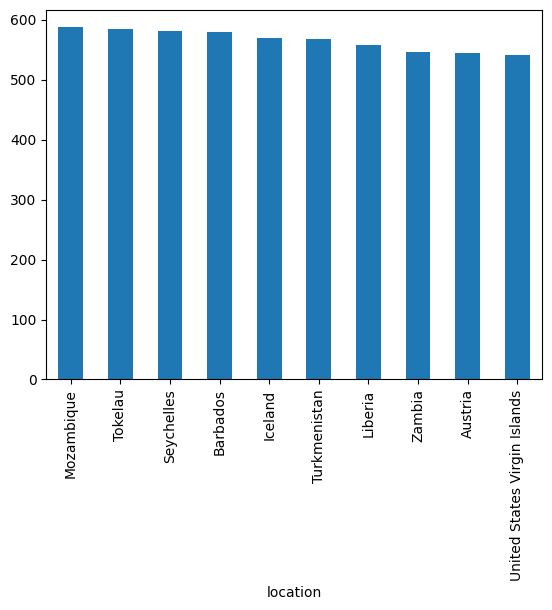

In [101]:
# Average purchasing power by country-top 10
success_orders.groupby('location')['price'].mean().sort_values(ascending=False).head(10).plot(kind='bar')

A look at the above chart shows that Mozambique has the highest purchasing power on an average but that could be misleading. A look at the analysis of the Mozambique and Korean orders below gives further insights:

Even though Korea is not in the top ten, they make up for a very strong part of the customer base of the company with their number of orders and purchases. They have the highest successful orders totalling 2322 orders.

In [102]:
korea = success_orders[success_orders['location']== 'Korea']
korea[['product','price']].value_counts().sort_values(ascending=False)

product                      price  
Microsoft Xbox Series X      499.99     11
Samsung 55-Inch 4K Smart TV  799.99     11
Fitbit Charge 4              149.95     10
Dell XPS 13 Laptop           1299.99     9
Samsung Galaxy S21           899.99      9
Starbucks Coffee Beans       12.99       9
iPhone 13                    1099.99     9
Sony WH-1000XM4 Headphones   349.99      8
Coca-Cola 12-Pack            5.99        8
Nike Air Max 270             129.99      8
Sony PlayStation 5           499.99      8
Apple AirPods Pro            249.99      7
Nintendo Switch              299.99      7
Adidas Ultraboost            180.00      6
Name: count, dtype: int64

In [103]:
mozam = success_orders[success_orders['location']== 'Mozambique']
mozam[['product','price']].value_counts().sort_values(ascending=False)

product                     price  
Dell XPS 13 Laptop          1299.99    2
Adidas Ultraboost           180.00     1
Apple AirPods Pro           249.99     1
Fitbit Charge 4             149.95     1
Nike Air Max 270            129.99     1
Nintendo Switch             299.99     1
Samsung Galaxy S21          899.99     1
Sony PlayStation 5          499.99     1
Sony WH-1000XM4 Headphones  349.99     1
iPhone 13                   1099.99    1
Name: count, dtype: int64

<Axes: xlabel='location'>

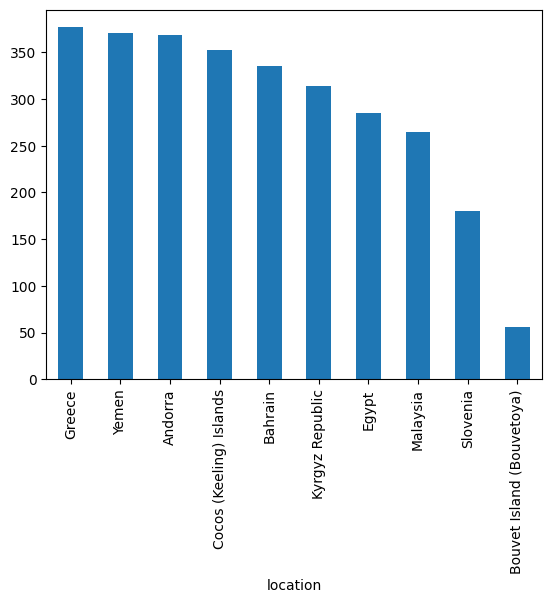

In [104]:
# Average purchasing power by country-bottom 10
success_orders.groupby('location')['price'].mean().sort_values(ascending=False).tail(10).plot(kind='bar')

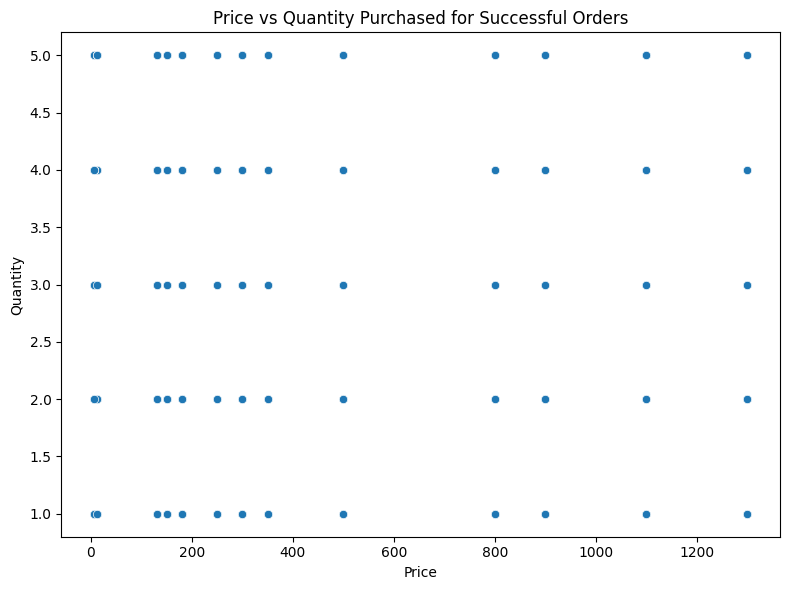

In [105]:
# Relationship between price and quantity purchased for successful orders

# Select numeric data only- quantity and price
success_numeric_data = success_orders[['quantity','price']]

# Plot scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=success_numeric_data, x='price', y='quantity')
plt.xlabel('Price')
plt.ylabel('Quantity')
plt.title('Price vs Quantity Purchased for Successful Orders')
plt.tight_layout()
plt.show()

This particular analysis is going to utilise all of the dataset-both successful and failed. I want to see the transition rate from adding items to cart to actually checking out

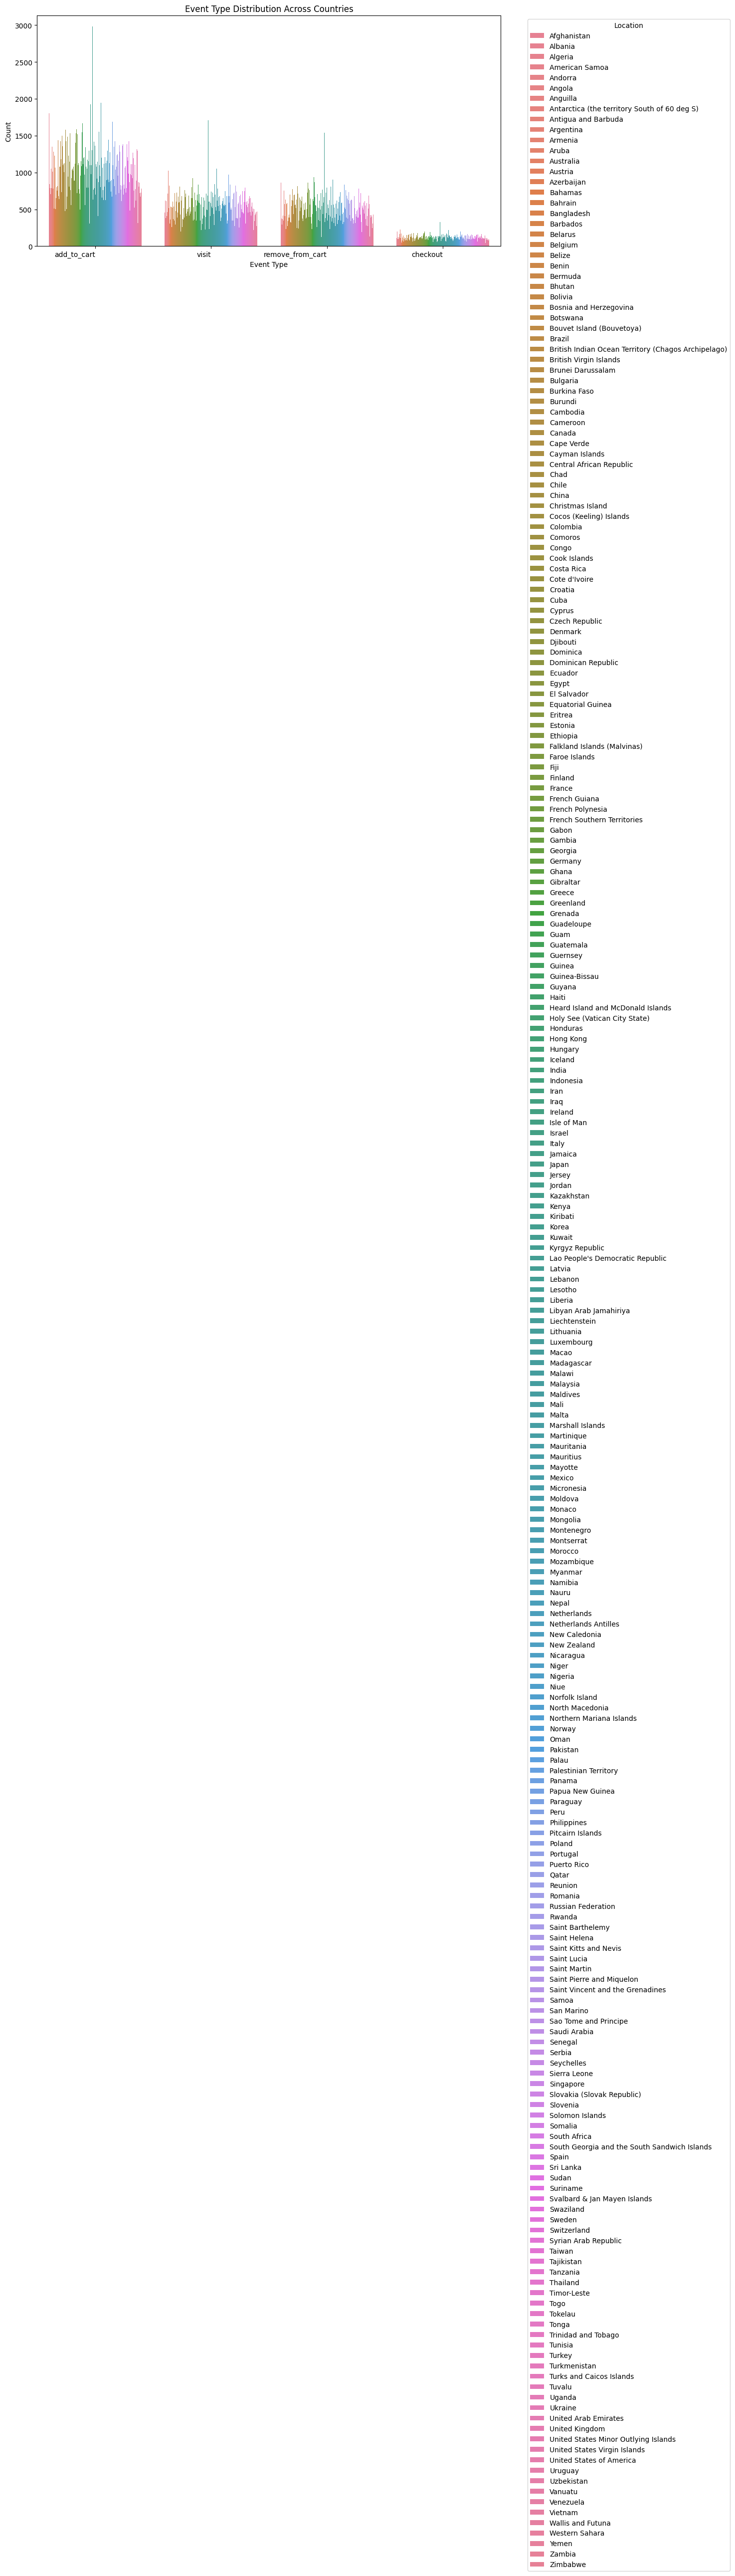

In [106]:
# Plotting event type distribution for all countries and the event_type customers carry out
location_event_type2 = location_event_type.reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=location_event_type2, x='event_type', y='count', hue='location', order=["add_to_cart", "visit", "remove_from_cart", "checkout"])
plt.xlabel('Event Type')
plt.ylabel('Count')
plt.title('Event Type Distribution Across Countries')
plt.xticks(ha='right')
plt.legend(title='Location', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [107]:
# Average purchases each day of the week
success_orders.groupby('Day')[['price','quantity']].mean()

,price,quantity
Day,,
Saturday,465.387295,2.991147


In [108]:
# Day of successful orders
success_orders['Day'].unique()

array(['Saturday'], dtype=object)

In [109]:
# Average purchases by time of the day
success_orders.groupby('AM/PM')[['price','quantity']].mean()

,price,quantity
AM/PM,,
AM,465.387295,2.991147


In [110]:
# Time of successful orders
success_orders['AM/PM'].unique()

array(['AM'], dtype=object)

In [111]:
# How long does it take customers to checkout?
success_orders['check_out_duration(days)'].value_counts()

check_out_duration(days)
0    9940
Name: count, dtype: int64

    CUSTOMER SEGMENTATION

I will be using an unsupervised machine learning technique to handle the segmentation of customers using the provided features in our dataset.

I will be using K-means clustering to segment the customers into various clusters and the parameters I will be using for the segmentation are based on the preferences, location, and purchasing power of the customers.

I am not going to add the Date, Day, Month, and Year feature. They are basically the same or with very low variance.

In [112]:
# Make a copy of the dataset so we can modify for clustering
clean_data4 = clean_data3.copy()

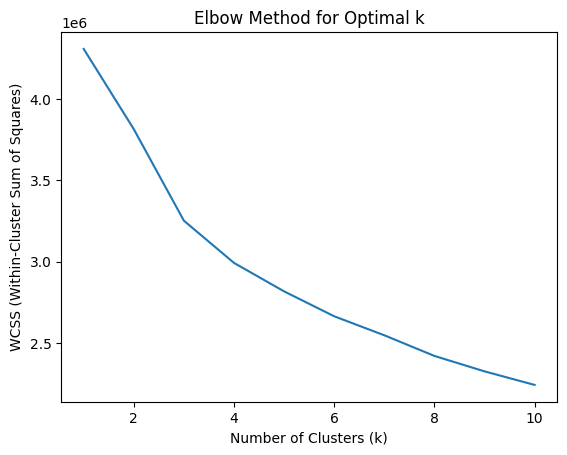

In [113]:
# Define categorical variables to be encoded
categorical_variables = ['event_type', 'location', 'status', 'currency', 'product', 'Day', 'Month', 'AM/PM']

# Create an instance of label encoder
label_encoder = LabelEncoder()

# Encode categorical variables
for category in categorical_variables:
    clean_data4[category] = label_encoder.fit_transform(clean_data4[category])

# Select features for clustering (adjust column indices based on your DataFrame)
features_for_clustering = clean_data4.iloc[:, [1, 2, 3, 4, 5, 6, 7, 11]].values

# Standardize the features
scaler = StandardScaler()
features_for_clustering_scaled = scaler.fit_transform(features_for_clustering)

# Perform PCA for dimensionality reduction to 2D
pca = PCA(n_components=2)
features_for_clustering_pca = pca.fit_transform(features_for_clustering_scaled)

# Determine optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(features_for_clustering_scaled)
    wcss.append(kmeans.inertia_)
    
# Plot the Elbow method to identify the optimal number of clusters
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal k')
plt.show()

# Optimal number of clusters (select based on elbow plot analysis)
k = 4

# Apply K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=0)
clusters = kmeans.fit_predict(features_for_clustering_scaled)
labels = kmeans.labels_

In [114]:
# Perform PCA for dimensionality reduction
pca = PCA(n_components=8)
principal_components = pca.fit_transform(features_for_clustering_scaled)

# Access the explained variance ratio of each principal component
explained_variance_ratio = pca.explained_variance_ratio_

In [115]:
# Define descriptive names for the principal components based on analysis
component_names = [
    "Customer Spending Behavior",
    "Product Preference Profile",
    "Seasonal Purchase Patterns",
    "Location-based Variations",
    "Transaction Frequency Trends",
    "Currency Usage Patterns",
    "Day of Week Insights",
    "Time of Day Patterns"
]

# Display the names and variance explained by each principal component
for i in range(len(component_names)):
    print(f"Principal Component {i+1} - {component_names[i]} (Explained Variance: {explained_variance_ratio[i]*100:.2f}%)")

Principal Component 1 - Customer Spending Behavior (Explained Variance: 16.08%)
Principal Component 2 - Product Preference Profile (Explained Variance: 15.79%)
Principal Component 3 - Seasonal Purchase Patterns (Explained Variance: 12.69%)
Principal Component 4 - Location-based Variations (Explained Variance: 12.60%)
Principal Component 5 - Transaction Frequency Trends (Explained Variance: 12.43%)
Principal Component 6 - Currency Usage Patterns (Explained Variance: 12.29%)
Principal Component 7 - Day of Week Insights (Explained Variance: 9.20%)
Principal Component 8 - Time of Day Patterns (Explained Variance: 8.93%)


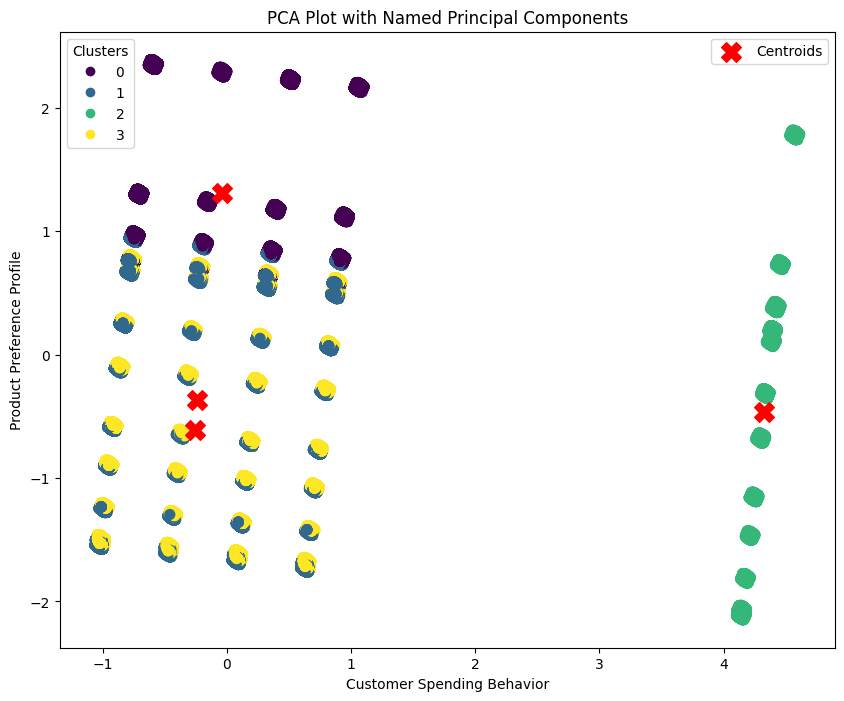

In [116]:
# Visualize PCA-transformed data with named principal components
plt.figure(figsize=(10, 8))
scatter = plt.scatter(principal_components[:, 0], principal_components[:, 1], c=clusters, cmap='viridis', s=50)
plt.title('PCA Plot with Named Principal Components')
plt.xlabel(f"{component_names[0]}")
plt.ylabel(f"{component_names[1]}")

# Add legend for clusters
legend1 = plt.legend(*scatter.legend_elements(), title='Clusters')
plt.gca().add_artist(legend1)

# Plot centroids (if applicable)
centroids_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=200, c='red', marker='X', label='Centroids')

plt.legend()
plt.show()

From the PCA plot above, we have four different categories of customers with different behaviours with respect to spending.

Segment 1(denoted by 0): These are customers that are do not spend so much on the website

Segment 2(denoted by 1): They are similar to customers in segment 1 also

Segment 3(denoted by 2): This is the point where we have customers that have the best spending behaviours on the website. More ads and loyalty plans such as bonuses and discounts should be targetted towards them.

Segment 4(denoted by 3): They are similar to customers in segment 1 and 2 also

In [117]:
# Adding the customer segment label to our original dataframe
clean_data3["label"]=labels
clean_data3.head(10)

,customer_id,event_type,location,currency,status,quantity,product,price,Day,Month,Year,AM/PM,Date,check_out_duration(days),label
0,e049bab94504,visit,Saint Helena,NGN,success,2,Microsoft Xbox Series X,499.99,Tuesday,March,2024,PM,2024-03-26,3,2
1,e049bab94504,visit,Saint Helena,NGN,success,4,Nike Air Max 270,129.99,Tuesday,March,2024,PM,2024-03-26,3,2
2,e049bab94504,visit,Saint Helena,NGN,success,5,Nintendo Switch,299.99,Tuesday,March,2024,PM,2024-03-26,3,2
3,e049bab94504,visit,Saint Helena,NGN,success,1,Coca-Cola 12-Pack,5.99,Tuesday,March,2024,PM,2024-03-26,3,2
4,e049bab94504,visit,Saint Helena,NGN,success,2,Adidas Ultraboost,180.00,Tuesday,March,2024,PM,2024-03-26,3,2
6,e049bab94504,visit,Saint Helena,NGN,success,2,Microsoft Xbox Series X,499.99,Wednesday,March,2024,AM,2024-03-27,2,1
7,e049bab94504,visit,Saint Helena,NGN,success,4,Nike Air Max 270,129.99,Wednesday,March,2024,AM,2024-03-27,2,3
8,e049bab94504,visit,Saint Helena,NGN,success,5,Nintendo Switch,299.99,Wednesday,March,2024,AM,2024-03-27,2,3
9,e049bab94504,visit,Saint Helena,NGN,success,1,Coca-Cola 12-Pack,5.99,Wednesday,March,2024,AM,2024-03-27,2,1
10,e049bab94504,visit,Saint Helena,NGN,success,2,Adidas Ultraboost,180.00,Wednesday,March,2024,AM,2024-03-27,2,1


Customers have been segmented and given a label each to specify their level of importance on a scale of 0,1,2,3.

In [118]:
customer_segment1 = clean_data3[clean_data3['label'] == 0]
customer_segment1

,customer_id,event_type,location,currency,status,quantity,product,price,Day,Month,Year,AM/PM,Date,check_out_duration(days),label
99,2da4b2d52dd3,visit,Ecuador,USD,cancelled,3,iPhone 13,1099.99,Friday,March,2024,AM,2024-03-29,1,0
101,2da4b2d52dd3,visit,Ecuador,USD,cancelled,3,Dell XPS 13 Laptop,1299.99,Friday,March,2024,AM,2024-03-29,1,0
113,2da4b2d52dd3,visit,Ecuador,USD,cancelled,3,iPhone 13,1099.99,Saturday,March,2024,AM,2024-03-30,0,0
115,2da4b2d52dd3,visit,Ecuador,USD,cancelled,3,Dell XPS 13 Laptop,1299.99,Saturday,March,2024,AM,2024-03-30,0,0
120,2da4b2d52dd3,visit,Ecuador,USD,cancelled,3,iPhone 13,1099.99,Saturday,March,2024,AM,2024-03-30,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578311,3dbf43c85a9d,visit,Christmas Island,USD,failed,3,iPhone 13,1099.99,Saturday,March,2024,AM,2024-03-30,0,0
578313,3dbf43c85a9d,add_to_cart,Christmas Island,USD,failed,3,iPhone 13,1099.99,Saturday,March,2024,AM,2024-03-30,0,0
578315,3dbf43c85a9d,add_to_cart,Christmas Island,USD,failed,3,iPhone 13,1099.99,Saturday,March,2024,AM,2024-03-30,0,0
578317,3dbf43c85a9d,remove_from_cart,Christmas Island,USD,failed,3,iPhone 13,1099.99,Saturday,March,2024,AM,2024-03-30,0,0


In [119]:
customer_segment2 = clean_data3[clean_data3['label'] == 1]
customer_segment2

,customer_id,event_type,location,currency,status,quantity,product,price,Day,Month,Year,AM/PM,Date,check_out_duration(days),label
6,e049bab94504,visit,Saint Helena,NGN,success,2,Microsoft Xbox Series X,499.99,Wednesday,March,2024,AM,2024-03-27,2,1
9,e049bab94504,visit,Saint Helena,NGN,success,1,Coca-Cola 12-Pack,5.99,Wednesday,March,2024,AM,2024-03-27,2,1
10,e049bab94504,visit,Saint Helena,NGN,success,2,Adidas Ultraboost,180.00,Wednesday,March,2024,AM,2024-03-27,2,1
12,e049bab94504,visit,Saint Helena,NGN,success,2,Microsoft Xbox Series X,499.99,Saturday,March,2024,AM,2024-03-30,0,1
15,e049bab94504,visit,Saint Helena,NGN,success,1,Coca-Cola 12-Pack,5.99,Saturday,March,2024,AM,2024-03-30,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578289,bf0de1cda133,add_to_cart,Liechtenstein,GBP,cancelled,2,Sony PlayStation 5,499.99,Saturday,March,2024,AM,2024-03-30,0,1
578293,bf0de1cda133,add_to_cart,Liechtenstein,GBP,cancelled,2,Starbucks Coffee Beans,12.99,Saturday,March,2024,AM,2024-03-30,0,1
578294,bf0de1cda133,add_to_cart,Liechtenstein,GBP,cancelled,2,Sony PlayStation 5,499.99,Saturday,March,2024,AM,2024-03-30,0,1
578298,bf0de1cda133,checkout,Liechtenstein,GBP,cancelled,2,Starbucks Coffee Beans,12.99,Saturday,March,2024,AM,2024-03-30,0,1


In [120]:
customer_segment3 = clean_data3[clean_data3['label'] == 2]
customer_segment3

,customer_id,event_type,location,currency,status,quantity,product,price,Day,Month,Year,AM/PM,Date,check_out_duration(days),label
0,e049bab94504,visit,Saint Helena,NGN,success,2,Microsoft Xbox Series X,499.99,Tuesday,March,2024,PM,2024-03-26,3,2
1,e049bab94504,visit,Saint Helena,NGN,success,4,Nike Air Max 270,129.99,Tuesday,March,2024,PM,2024-03-26,3,2
2,e049bab94504,visit,Saint Helena,NGN,success,5,Nintendo Switch,299.99,Tuesday,March,2024,PM,2024-03-26,3,2
3,e049bab94504,visit,Saint Helena,NGN,success,1,Coca-Cola 12-Pack,5.99,Tuesday,March,2024,PM,2024-03-26,3,2
4,e049bab94504,visit,Saint Helena,NGN,success,2,Adidas Ultraboost,180.00,Tuesday,March,2024,PM,2024-03-26,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578232,bf0de1cda133,visit,Liechtenstein,GBP,cancelled,3,Microsoft Xbox Series X,499.99,Thursday,March,2024,PM,2024-03-21,8,2
578233,bf0de1cda133,visit,Liechtenstein,GBP,cancelled,2,Starbucks Coffee Beans,12.99,Thursday,March,2024,PM,2024-03-21,8,2
578234,bf0de1cda133,visit,Liechtenstein,GBP,cancelled,2,Sony PlayStation 5,499.99,Thursday,March,2024,PM,2024-03-21,8,2
578302,3dbf43c85a9d,visit,Christmas Island,USD,failed,3,Microsoft Xbox Series X,499.99,Thursday,March,2024,PM,2024-03-21,8,2


In [121]:
customer_segment4 = clean_data3[clean_data3['label'] == 3]
customer_segment4

,customer_id,event_type,location,currency,status,quantity,product,price,Day,Month,Year,AM/PM,Date,check_out_duration(days),label
7,e049bab94504,visit,Saint Helena,NGN,success,4,Nike Air Max 270,129.99,Wednesday,March,2024,AM,2024-03-27,2,3
8,e049bab94504,visit,Saint Helena,NGN,success,5,Nintendo Switch,299.99,Wednesday,March,2024,AM,2024-03-27,2,3
13,e049bab94504,visit,Saint Helena,NGN,success,4,Nike Air Max 270,129.99,Saturday,March,2024,AM,2024-03-30,0,3
14,e049bab94504,visit,Saint Helena,NGN,success,5,Nintendo Switch,299.99,Saturday,March,2024,AM,2024-03-30,0,3
19,e049bab94504,visit,Saint Helena,NGN,success,4,Nike Air Max 270,129.99,Saturday,March,2024,AM,2024-03-30,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578310,3dbf43c85a9d,visit,Christmas Island,USD,failed,3,Microsoft Xbox Series X,499.99,Saturday,March,2024,AM,2024-03-30,0,3
578312,3dbf43c85a9d,add_to_cart,Christmas Island,USD,failed,3,Microsoft Xbox Series X,499.99,Saturday,March,2024,AM,2024-03-30,0,3
578314,3dbf43c85a9d,add_to_cart,Christmas Island,USD,failed,3,Microsoft Xbox Series X,499.99,Saturday,March,2024,AM,2024-03-30,0,3
578316,3dbf43c85a9d,remove_from_cart,Christmas Island,USD,failed,3,Microsoft Xbox Series X,499.99,Saturday,March,2024,AM,2024-03-30,0,3


# SUMMARY OF KEY FINDINGS

    VISIT FREQUENCY

1. The frequency of visitation varies throughout the week, with Saturday being the busiest day, recording 498,158 visits. Wednesday follows with 9,369 visits, closely trailed by Thursday with 8,907 visits. Tuesday and Friday see 7,814 and 5,285 visits respectively, while Monday and Sunday round off the week with 4,642 and 4,430 visits respectively.

2. Among the customer visitations, several customers emerge as popular visitors. The top five customers that frequent the website are 1f57130130cb, from Naru with 360 visits, d12e3eaca47d, from Bolivia with 360 visits, cc1402500ac7, from Turkey with 348 visits, 5e5dc4f32b9c, from French Southern Territories with 348, and 1e5725fe2338, from Saint Helena with 341 visits.

3. The analysis also divides visits into morning and afternoon/evening categories. The morning sees a significant influx of visitors, totaling 516,062, while the afternoon and evening visits accumulate to 22,543, indicating a notable disparity in visitation patterns throughout the day.

4. Regarding geographic preferences, certain locations stand out as prime destinations. Korea leads the pack with 6,557 visits, followed by Argentina with 4,261 visits. Mauritius, Jersey, and Panama also feature prominently, with 4,118, 3,957, and 3,701 visits respectively, showcasing a diverse range of popular destinations among visitors.

    LOCATION ANALYSIS

1. The website attracts visitors from a diverse array of 243 unique locations.

2. A breakdown of website visitor locations alongside their respective purposes of visits reveals significant variations. Afghanistan emerges as the location with the highest engagement, recording 860 instances of adding items to the cart, 460 visits, 380 removals from the cart, and 110 checkouts. Conversely, Zimbabwe registers comparatively lower figures, with 781 add-to-cart actions, 473 visits, 429 removals from the cart, and 93 checkouts which is the lowest.

3. Among the various customer demographics, Korea stands out as the location with the highest visitation, totaling 6,557 visits. However, a closer examination reveals that only 2,322 of these visits culminated in successful orders with checkouts.

4. Korea appears to exhibit a significant discrepancy in order outcomes, serving as both the location with the highest number of successful orders, totaling 2,322, and the highest number of failed orders, reaching 1,858.

5. The most sought-after products on the website, based on the number of interactions, include the Fitbit Charge 4 with 39,268 engagements, followed closely by the Sony WH-1000XM4 Headphones with 39,162 interactions. The Dell XPS 13 Laptop, Samsung Galaxy S21, and iPhone 13 also rank among the top five popular products, with engagement figures of 39,084, 38,997, and 38,866 respectively.

    OVERALL PURCHASE BEHAVIOUR

This is entirely based on successful orders alone except for item 2

1. The average purchasing power of customers is calculated at $465.39. However, a close examination reveals that the top five countries by purchasing power demonstrate higher average values. Leading this list is Mozambique with a purchasing power of $587.26, followed closely by Tokelau at $584.12, Seychelles at $580.63, Barbados at $579.63, and Iceland at $570.40.

    Although Mozambique has the highest purchasing power on an average, a closer look at the analysis of the Mozambique and Korean orders gives further insight:

    Even though Korea is not in the top ten, they make up for a very strong part of the customer base of the company with their number of orders and purchases. They have the highest successful orders totalling 2322 orders and they also have the highest visitation rate.

2. Despite approximately 15,000 instances of customers adding items to their carts, the conversion rate to actual checkouts remains disappointingly low, with fewer than 3,000 transactions completed. This disparity indicates an imbalance in the customer journey and suggests room for improvement in enhancing the conversion process.

3. All purchases occurred on Saturday, March 30th, with an average purchase value of $465.39 on that particular day. Notably, these transactions predominantly took place in the morning, with an average checkout duration of zero days, indicating swift and immediate purchase decisions by customers during this timeframe.

# RECOMMENDATIONS

    WEBSITE OPTIMIZATION
Improve User Experience: Enhance the website's user interface and navigation, particularly during peak visitation times such as Saturdays. Ensure that the website is responsive and mobile-friendly to cater to different devices used by customers. Implement clear and obvious call to action to aid checkouts too.

Streamline Checkout Process: Address the low conversion rate by simplifying the checkout process. Implement features like guest checkout, one-click purchasing, and clear calls-to-action to encourage customers to complete their transactions.

Personalized Recommendations: Utilize customer data to provide personalized product recommendations and offers, enhancing the overall shopping experience and increasing the likelihood of conversion. This could be really handy for location segments.

    PRODUCT OFFERINGS

Highlight Popular Products: Prominently feature highly sought-after products like the Fitbit Charge 4, Sony WH-1000XM4 Headphones, and Dell XPS 13 Laptop on the website. Consider offering promotions or discounts on these products to drive sales.

Diversify Product Range: Expand the product catalog to include a wider variety of products that cater to diverse customer preferences. Conduct market research to identify emerging trends and consumer demands to guide product expansion efforts.

    MARKETING STRATEGIES

Targeted Marketing Campaigns: Develop customer segments based on their geographic location, preferences, and purchasing behavior and tailor marketing campaigns and promotions towards each segment. Use email marketing, social media advertising, and retargeting strategies to reach each of the segments.

Leverage Customer Reviews: Encourage satisfied customers to leave reviews and testimonials on the website to build trust and credibility with potential buyers. Showcase positive reviews and ratings prominently to influence purchasing decisions because of the aversion people have towards ecommerce websites.

Engage Customers Through Content: Create engaging content such as blog posts, videos, and interactive quizzes related to popular products to educate and engage customers.

The marketing activities should be targetted more towards customers in segment 3, those are the customers that have the best spending behaviours on the website. More ads and loyalty plans such as bonuses and discounts should be targetted towards them.

    CUSTOMER ENGAGEMENT AND RETENTION

Reward Loyalty: Implement a loyalty program to incentivize repeat purchases and reward loyal customers. Offer exclusive discounts, rewards points, or freebies to customers who frequently engage with the website and make purchases.

Provide Excellent Customer Support: Invest in providing excellent customer support services to address any queries or concerns promptly. Offer multiple channels for customer communication, including live chat, email support, and phone assistance, to ensure a seamless shopping experience. This would help to increase checkout rate on the website.

Continuous Monitoring and Optimization: Regularly monitor key performance indicators such as conversion rates, customer satisfaction scores, and website traffic to identify areas for improvement. Continuously optimize website features, product offerings, and marketing strategies based on customer feedback and market trends to stay competitive in the e-commerce landscape.

# FURTHER RESEARCH

The analysis carried out on the data provided by ShopSmart Inc. has been quite insightful to say the least but there is need for collecting more data to better understand some strange patterns in the data, this would help to better recommend specific course of actions for the business. For context, some of those strange patterns raised questions such as:

1. Why would a business have about 15,000 people adding items to cart but less than 3,000 of them actually check out succesfully?

2. Why would all the successful orders choose to happen on Saturday 30th in the morning and that was it? etc

These are my recommendations moving forward:

    Demographic Information

Collect demographic data such as age, gender, income level, and occupation to help in understanding the customers better which would lead to more targeted marketing campaigns and product offerings to specific customer segments.

    Customer Feedback and Surveys: 

Implementing feedback mechanisms such as surveys or feedback forms can provide valuable insights into customer satisfaction levels, pain points, and areas for improvement. Gathering qualitative data directly from customers can help in refining products, services, and overall customer experience. This would go a long way to understand why the check out rate vs add to cart rate is absurd.

    Website Interaction Data: 

Track additional website interaction metrics such as time spent on each page, click-through rates, bounce rates, and scroll depth. This would help understand the performance of the website.

    Social Media Engagement: 

Monitor social media channels for mentions, comments, and interactions related to ShopSmart Inc. and its products. Analyzing social media data can provide insights into brand sentiment, customer preferences, and overall feedback. Feedback that is not solicited for most times are genuine

    Competitor Analysis: 

This would help to understand ShopSmart's standing in the market